# **Data Insight in Fashion & Beauty Supply Chain**


# **Project Overview**

### Objective

The primary goal of this project is to conduct an extensive analysis of supply chain data, focusing on extracting key insights and identifying opportunities for improvement. Although this initiative is primarily for practice purposes, it aims to explore various components of the supply chain, ranging from operational efficiency to cost management. The objective is to develop a deeper understanding of these processes and propose potential strategic improvements.


For this project, due to the numerous code sections, I have included a 'library' segment in each code chunk. This ensures that all necessary packages are loaded and the same data is imported each time. This approach allows each code chunk to function independently and smoothly, eliminating the need to execute the entire code from the beginning in each session. Furthermore, for clearer visualisations, you can find them in the 'Output' panel above.

# **Data Collection and Analysis Steps**

1. **Data Import and Preliminary Inspection:**
   - Import the supply chain dataset in CSV format and perform an initial review to understand its structure and content.
   - *Note: The 'Revenue Generated' column may not exactly match the expected product of unit price and quantity sold. Acknowledging this, the analysis will proceed using the provided revenue figures, without adjusting for potential factors like discounts, returns, or taxes.
    
2. **Data Cleaning and Validation:**
    - 1.Missing Values Assessment: Identify and remediate missing data in key fields like Price, Availability, and Number of Products Sold.
    - 2.Data Type Confirmation: Verify that each column is classified with the appropriate data type (numeric, text, etc.).
    - 3.SKU Integrity Check: Confirm that SKU identifiers are unique and correctly aligned with their respective Product Types.
     
3. **Descriptive Statistical Analysis:**
    - Conduct an analysis of central tendency and dispersion (mean, median, mode, range, standard deviation) for quantitative variables such as Price, Availability, Number of Products Sold, and Revenue.
    
### **Product and Customer Analysis**

1. **Trend Analysis by Product Type:**
    - Investigate patterns across three key areas: Total Revenue, Average Stock Levels, and Average Lead Times (time from order placement to fulfillment).

2. **Customer Segmentation and Sales Analysis:**
    - 1.Demographic Profiling: Analyse customer demographics to better understand the consumer base for each product category.
    - 2.Demographic Sales Trends: Examine how sales figures correlate with different demographic segments.
    
3. **Predictive Analytics for Future Planning:**
    - *Note: Demand Forecasting usually relies on historical sales data. Lacking that, this analysis uses 'Availability' in relation to 'Price', 'Sales Volume', and 'Lead Times' for predictive insights.                        
    - Insightful Comparisons: Analysing how Availability interacts with Price, Number of Products Sold, and Lead Times offers strategic insights for inventory management and forecasting, beneficial even when historical sales data is not available.
    
### **Supply Chain Analysis**

1. **Supply Chain Performance Evaluation:**
    - 1.Lead Time Scrutiny: Examine both Lead Times and Manufacturing Lead Time for potential delays.
    - 2.Supplier Assessment: Evaluate suppliers based on Lead Times, Defect Rates, and Inspection Outcomes.
    - 3.Supplier Risk Assessment: Analyse and visualise supplier risks by comparing Lead Times, Defect Rates, and Inspection Outcomes to identify potential vulnerabilities in the supply chain.
     
2. **Cost Management Analysis:**
    - 1.Expense Analysis: Scrutinise Shipping and Manufacturing Costs to identify reduction opportunities.
    - 2.Profitability Review: Contrast Costs with Revenue to assess overall profitability.

3. **Logistics Optimisation Study:**
    - 1.Shipping Method Review: Evaluate Shipping Duration, Carriers, and Modes for logistical improvements.
    - 2.Route Optimisation: Analyse transportation routes for efficiency gains.

### **Key Findings and Suggestions**:
  Based on the analysis, suggest improvements or strategies for the supply chain.

# **Tools Required**
#### Before executing any of the code chunks in this project, please ensure the following tools are installed.
- **tidyverse:** For data import and wrangling.
- **ggplot2:** For visualization.

In [ ]:
# Install packages
install.packages("tidyverse")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Data Import and Preliminary Inspection

#### **Import the supply chain dataset in CSV format and perform an initial review to understand its structure and content.**
#### * Note: The 'Revenue Generated' column may not exactly match the expected product of unit price and quantity sold. Acknowledging this, the analysis will proceed using the provided revenue figures, without adjusting for potential factors like discounts, returns, or taxes.

In [ ]:
# Load necessary libraries
library(readr)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Inspect data
head(supply_chain_data)  #See the first 6 rows of data frame
str(supply_chain_data)  #See list of columns and data types (numeric, character, etc)
summary(supply_chain_data)  #Statistical summary focusing on numeric values


Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,⋯,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
haircare,SKU0,69.808006,55,802,8661.997,Non-binary,58,7,96,⋯,Mumbai,29,215,29,46.27988,Pending,0.2264104,Road,Route B,187.7521
skincare,SKU1,14.843523,95,736,7460.900,Female,53,30,37,⋯,Mumbai,23,517,30,33.61677,Pending,4.8540680,Road,Route B,503.0656
haircare,SKU2,11.319683,34,8,9577.750,Unknown,1,10,88,⋯,Mumbai,12,971,27,30.68802,Pending,4.5805926,Air,Route C,141.9203
skincare,SKU3,61.163343,68,83,7766.836,Non-binary,23,13,59,⋯,Kolkata,24,937,18,35.62474,Fail,4.7466486,Rail,Route A,254.7762
skincare,SKU4,4.805496,26,871,2686.505,Non-binary,5,3,56,⋯,Delhi,5,414,3,92.06516,Fail,3.1455795,Air,Route A,923.4406
haircare,SKU5,1.699976,87,147,2828.349,Non-binary,90,27,66,⋯,Bangalore,10,104,17,56.76648,Fail,2.7791935,Road,Route A,235.4612


spc_tbl_ [100 × 24] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Product type           : chr [1:100] "haircare" "skincare" "haircare" "skincare" ...
 $ SKU                    : chr [1:100] "SKU0" "SKU1" "SKU2" "SKU3" ...
 $ Price                  : num [1:100] 69.81 14.84 11.32 61.16 4.81 ...
 $ Availability           : num [1:100] 55 95 34 68 26 87 48 59 78 35 ...
 $ Number of products sold: num [1:100] 802 736 8 83 871 147 65 426 150 980 ...
 $ Revenue generated      : num [1:100] 8662 7461 9578 7767 2687 ...
 $ Customer demographics  : chr [1:100] "Non-binary" "Female" "Unknown" "Non-binary" ...
 $ Stock levels           : num [1:100] 58 53 1 23 5 90 11 93 5 14 ...
 $ Lead times             : num [1:100] 7 30 10 13 3 27 15 17 10 27 ...
 $ Order quantities       : num [1:100] 96 37 88 59 56 66 58 11 15 83 ...
 $ Shipping times         : num [1:100] 4 2 2 6 8 3 8 1 7 1 ...
 $ Shipping carriers      : chr [1:100] "Carrier B" "Carrier A" "Carrier B" "Carrier C" ...
 $ Shipping costs     

 Product type           SKU                Price        Availability   
 Length:100         Length:100         Min.   : 1.70   Min.   :  1.00  
 Class :character   Class :character   1st Qu.:19.60   1st Qu.: 22.75  
 Mode  :character   Mode  :character   Median :51.24   Median : 43.50  
                                       Mean   :49.46   Mean   : 48.40  
                                       3rd Qu.:77.20   3rd Qu.: 75.00  
                                       Max.   :99.17   Max.   :100.00  
 Number of products sold Revenue generated Customer demographics
 Min.   :  8.0           Min.   :1062      Length:100           
 1st Qu.:184.2           1st Qu.:2813      Class :character     
 Median :392.5           Median :6006      Mode  :character     
 Mean   :461.0           Mean   :5776                           
 3rd Qu.:704.2           3rd Qu.:8254                           
 Max.   :996.0           Max.   :9866                           
  Stock levels      Lead times    Order q

# Data Cleaning and Validation

#### **1. Missing Values Assessment: Identify and remediate missing data in key fields like Price, Availability, and Number of Products Sold.**
#### **2. Data Type Confirmation: Verify that each column is classified with the appropriate data type (numeric, text, etc.).**
#### **3. SKU Integrity Check: Confirm that SKU identifiers are unique and correctly aligned with their respective Product Types.**

In [ ]:
# Load necessary libraries
library(readr)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# 1. Checking for Missing Values
missing_values <- sapply(supply_chain_data, function(x) sum(is.na(x)))

# 2. Data Type Verification
data_types <- sapply(supply_chain_data, class)

# 3. SKU Analysis
# Checking if SKUs are unique
unique_skus <- length(unique(supply_chain_data$SKU)) == nrow(supply_chain_data)

# Output the results
list(missing_values = missing_values, data_types = data_types, unique_skus = unique_skus)

names(supply_chain_data)

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


$missing_values
           Product type                     SKU                   Price 
                      0                       0                       0 
           Availability Number of products sold       Revenue generated 
                      0                       0                       0 
  Customer demographics            Stock levels              Lead times 
                      0                       0                       0 
       Order quantities          Shipping times       Shipping carriers 
                      0                       0                       0 
         Shipping costs           Supplier name                Location 
                      0                       0                       0 
              Lead time      Production volumes Manufacturing lead time 
                      0                       0                       0 
    Manufacturing costs      Inspection results            Defect rates 
                      0                       0                       0 
   Transportation modes                  Routes                   Costs 
                      0                       0                       0 

$data_types
           Product type                     SKU                   Price 
            "character"             "character"               "numeric" 
           Availability Number of products sold       Revenue generated 
              "numeric"               "numeric"               "numeric" 
  Customer demographics            Stock levels              Lead times 
            "character"               "numeric"               "numeric" 
       Order quantities          Shipping times       Shipping carriers 
              "numeric"               "numeric"             "character" 
         Shipping costs           Supplier name                Location 
              "numeric"             "character"             "character" 
              Lead time      Production volumes Manufacturing lead time 
              "numeric"               "numeric"               "numeric" 
    Manufacturing costs      Inspection results            Defect rates 
              "numeric"             "character"               "numeric" 
   Transportation modes                  Routes                   Costs 
            "character"             "character"               "numeric" 

$unique_skus
[1] TRUE

[1] "Product type"            "SKU"                    
 [3] "Price"                   "Availability"           
 [5] "Number of products sold" "Revenue generated"      
 [7] "Customer demographics"   "Stock levels"           
 [9] "Lead times"              "Order quantities"       
[11] "Shipping times"          "Shipping carriers"      
[13] "Shipping costs"          "Supplier name"          
[15] "Location"                "Lead time"              
[17] "Production volumes"      "Manufacturing lead time"
[19] "Manufacturing costs"     "Inspection results"     
[21] "Defect rates"            "Transportation modes"   
[23] "Routes"                  "Costs"

# Descriptive Statistical Analysis

#### **Conduct an analysis of central tendency and dispersion (mean, median, mode, range, standard deviation) for quantitative variables such as Price, Availability, Number of Products Sold, and Revenue.**


In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Function to calculate mode
get_mode <- function(v) {
  uniqv <- unique(v)
  tabulated <- tabulate(match(v, uniqv))
  if (all(tabulated == max(tabulated))){ return(NA) }
  uniqv[which.max(tabulated)]
}

# Filter only numeric columns
numeric_data <- supply_chain_data %>% select_if(is.numeric)

# Calculate summary statistics for each numeric variable
numeric_summary <- sapply(numeric_data, function(x) {
  c(mean = mean(x, na.rm = TRUE),
    median = median(x, na.rm = TRUE),
    mode = get_mode(x),
    range = max(x, na.rm = TRUE) - min(x, na.rm = TRUE),
    sd = sd(x, na.rm = TRUE))
})

# Convert the summary to a data frame
numeric_summary_df <- as.data.frame(t(numeric_summary))


print(numeric_summary_df)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


                               mean      median mode       range          sd
Price                     49.462461   51.239831   NA   97.471353   31.168193
Availability              48.400000   43.500000   11   99.000000   30.743317
Number of products sold  460.990000  392.500000  336  988.000000  303.780074
Revenue generated       5776.048187 6006.352023   NA 8804.846935 2732.841744
Stock levels              47.770000   47.500000    5  100.000000   31.369372
Lead times                15.960000   17.000000   27   29.000000    8.785801
Order quantities          49.220000   52.000000   85   95.000000   26.784429
Shipping times             5.750000    6.000000    8    9.000000    2.724283
Shipping costs             5.548149    5.320534   NA    8.916330    2.651376
Lead time                 17.080000   18.000000   18   29.000000    8.846251
Production volumes       567.840000  568.500000  791  881.000000  263.046861
Manufacturing lead time   14.770000   14.000000    7   29.000000    8.912430

# Product and Customer Analysis: **1. Trend Analysis by Product Type**
#### **Investigate patterns across three key areas: Total Revenue, Average Stock Levels, and Average Lead Times (time from order placement to fulfillment).**

#### Total Revenue by Product Type


Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


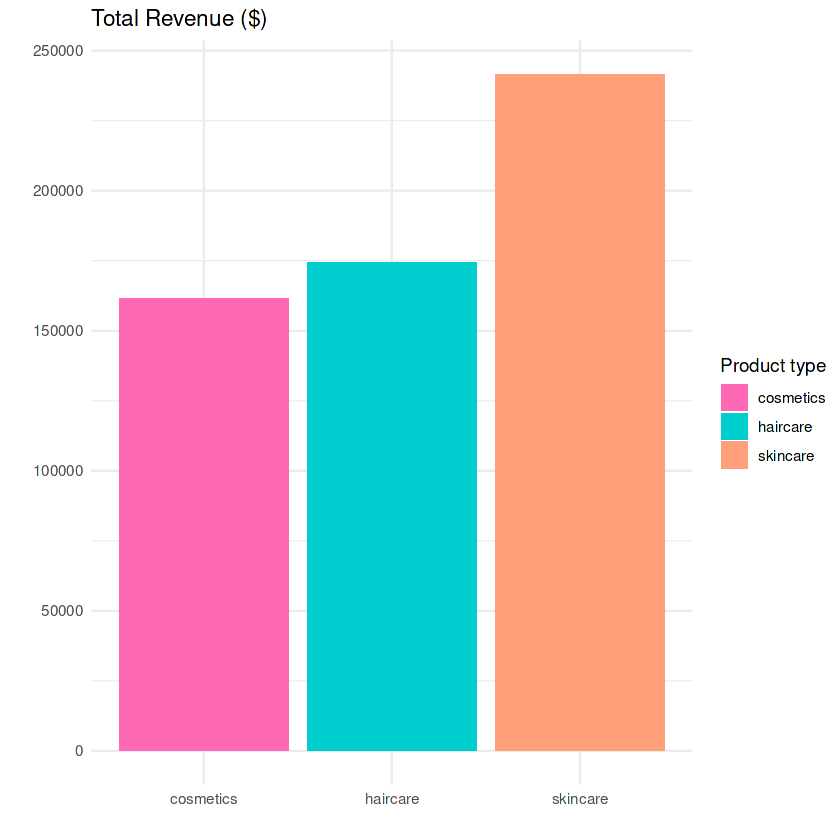

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Define custom colors for product type
my_colors <- c("cosmetics" = "hotpink", "haircare" = "cyan3", "skincare" = "lightsalmon")

# Calculate Total Revenue by Product Type
Total_Revenue_by_Product_Type  <- supply_chain_data %>%
  group_by(`Product type`) %>%
  summarise(`Total Revenue` = sum(`Revenue generated`, na.rm = TRUE)) %>%
  ggplot(aes(x = `Product type`, y = `Total Revenue`, fill = `Product type`)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Revenue ($)", x = " ", y = " ") +
  theme_minimal() +
  scale_fill_manual(values = my_colors)

print(Total_Revenue_by_Product_Type)

# Save the plot with custom dimensions
ggsave("1-1 Total_Revenue_by_Product_Type.png", plot = Total_Revenue_by_Product_Type, width = 8, height = 6)


#### Average Stock Level by Product Type

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


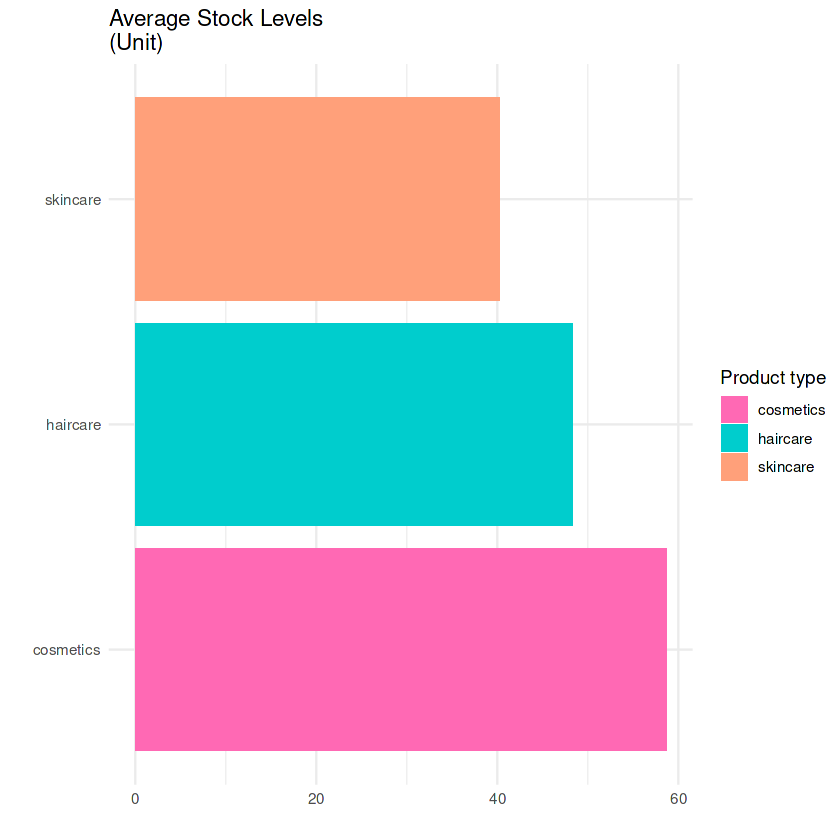

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Define custom colors for product type
my_colors <- c("cosmetics" = "hotpink", "haircare" = "cyan3", "skincare" = "lightsalmon")

# Calculate Average Stock Level by Product Type and create bar chart
Average_Stock_Level_by_Product_Type <- supply_chain_data %>%
  group_by(`Product type`) %>%
  summarise(`Average Stock Level` = mean(`Stock levels`, na.rm = TRUE)) %>%
  ggplot(aes(x = `Average Stock Level`, y = `Product type`, fill = `Product type`)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Stock Levels \n(Unit)", y = " ", x = " ") +
  theme_minimal() +
  scale_fill_manual(values = my_colors)

print(Average_Stock_Level_by_Product_Type)

# Save the plot with custom dimensions
ggsave("1-2 Average_Stock_Level_by_Product_Type.png", plot = Average_Stock_Level_by_Product_Type, width = 8, height = 6)

#### Average lead Times(time from order placement to fulfillment) by Product Type

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


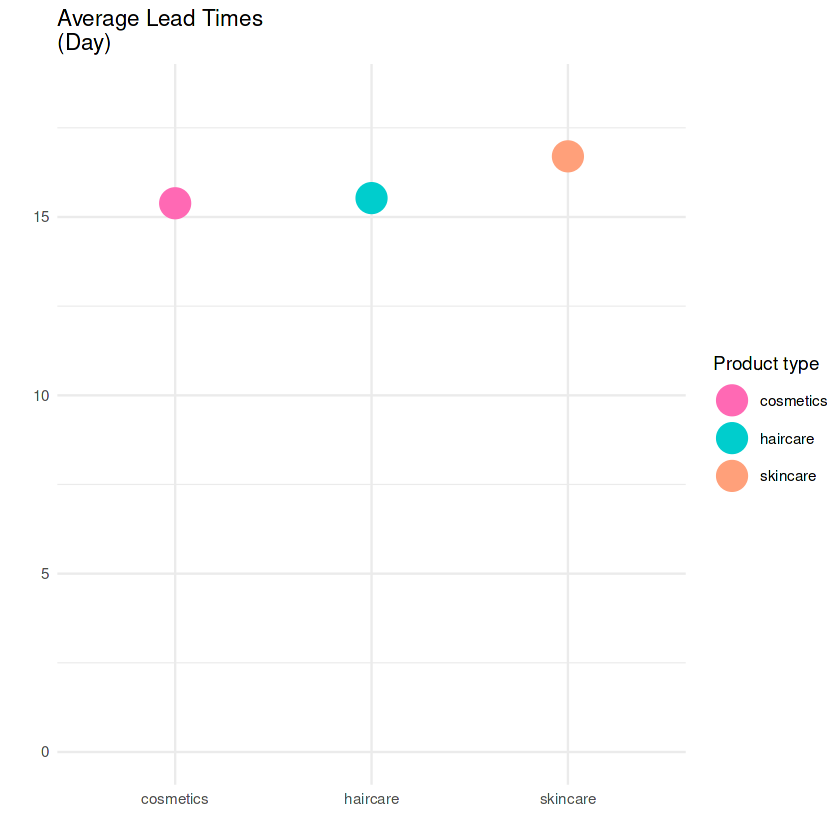

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Define custom colors for product type
my_colors <- c("cosmetics" = "hotpink", "haircare" = "cyan3", "skincare" = "lightsalmon")

# Calculate Average Lead Times by Product Type
average_lead_times <- supply_chain_data %>%
  group_by(`Product type`) %>%
  summarise(`Average Lead Times` = mean(`Lead times`, na.rm = TRUE))

# Create scatter plot
Average_Lead_Times_by_Product_Type <- ggplot(average_lead_times, aes(x = `Product type`, y = `Average Lead Times`, color = `Product type`)) +
  geom_point(size = 8) +
  labs(title = "Average Lead Times\n(Day)", x = "", y = " ") +
  theme_minimal() +
  scale_color_manual(values = my_colors) +
  scale_y_continuous(
    limits = c(0, max(average_lead_times$`Average Lead Times`) * 1.1), # Set upper limit to 110% of the max value
    breaks = seq(0, max(average_lead_times$`Average Lead Times`) * 1.1, by = 5) # Adjust the breaks accordingly
  )
print(Average_Lead_Times_by_Product_Type)

# Save the plot with custom dimensions
ggsave("1-3 Average_Lead_Times_by_Product_Type.png", plot = Average_Lead_Times_by_Product_Type, width = 8, height = 6)

### **Integrated Overview: Total Revenue, Average Stock Levels, and Lead Times**
#### In this section, I present a concise, side-by-side display of these three key charts. This format allows for a clear, unified view of the financial performance, inventory management, and order fulfillment efficiency that I have analysed.


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TableGrob (2 x 3) "arrange": 4 grobs
  z     cells    name                grob
1 1 (2-2,1-1) arrange      gtable[layout]
2 2 (2-2,2-2) arrange      gtable[layout]
3 3 (2-2,3-3) arrange      gtable[layout]
4 4 (1-1,1-3) arrange text[GRID.text.442]


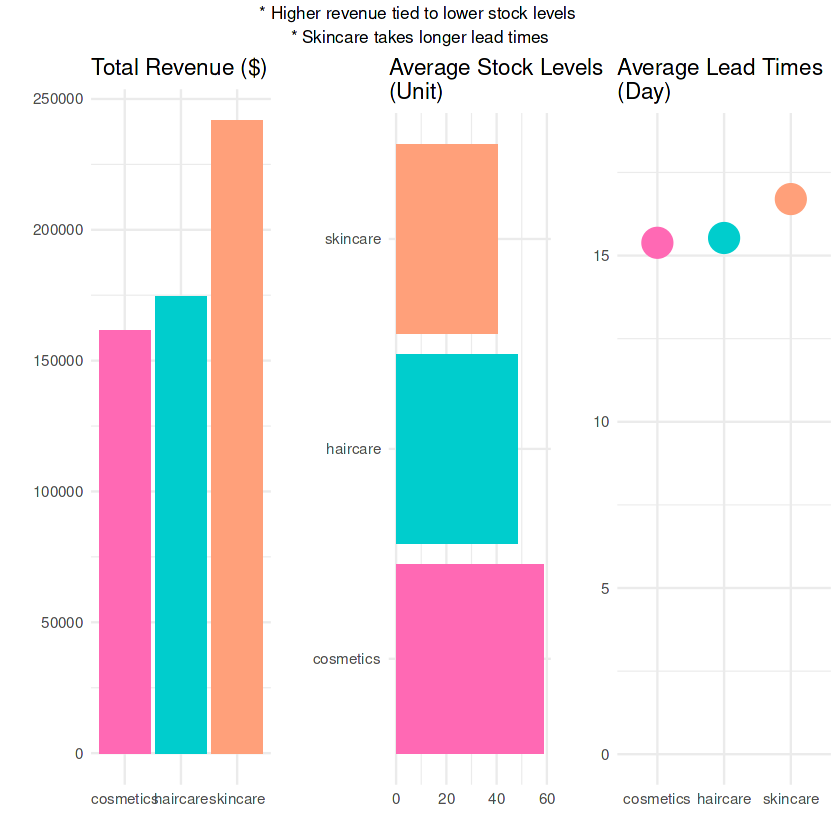

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(grid)

# Define custom colors for product type
my_colors <- c("cosmetics" = "hotpink", "haircare" = "cyan3", "skincare" = "lightsalmon")

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Combine 3 plots into one grid
Overview_for_Revenue_Stock_Leadtimes <- grid.arrange(
  Total_Revenue_by_Product_Type + theme(legend.position = "none"),
  Average_Stock_Level_by_Product_Type + theme(legend.position = "none"),
  Average_Lead_Times_by_Product_Type + theme(legend.position = "none"),
  ncol = 3,
  top = textGrob(
    label = "* Higher revenue tied to lower stock levels \n* Skincare takes longer lead times",
    gp = gpar(fontsize = 10),
    hjust = 0.5
  )
)

print(Overview_for_Revenue_Stock_Leadtimes)

# Save the plot with custom dimensions
ggsave("1-4 Overview_for_Revenue_Stock_Leadtimes.png", plot = Overview_for_Revenue_Stock_Leadtimes, width = 8, height = 6)

# Product and Customer Analysis: **2. Customer Segmentation and Sales Analysis**

#### **1. Demographic Profiling: Analyse customer demographics to better understand the consumer base for each product category.**


Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'Product type'. You can override using the
`.groups` argument.


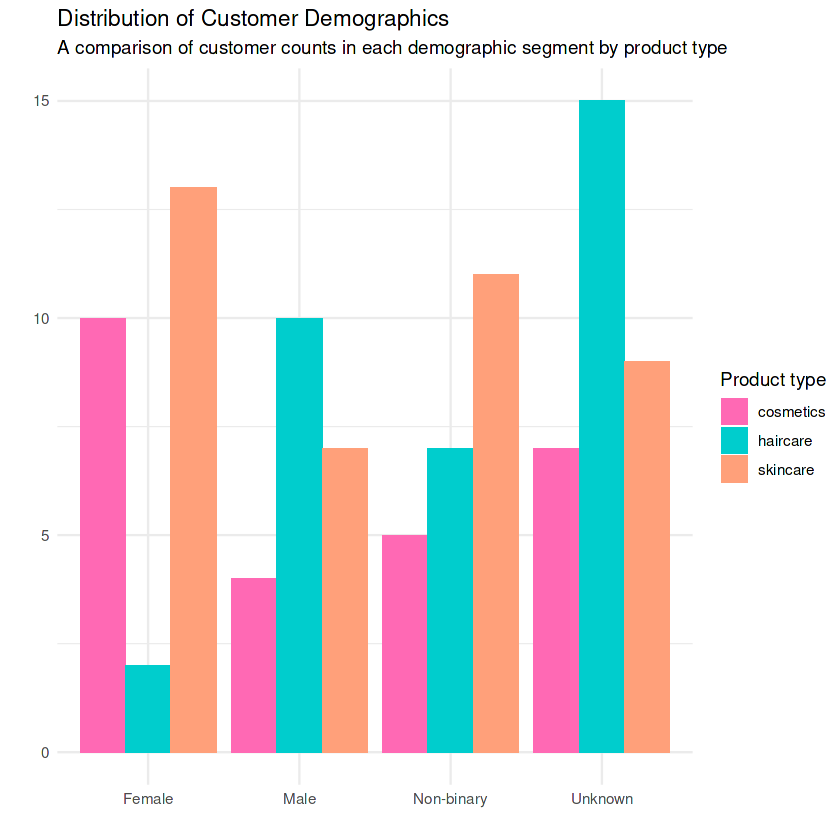

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Define custom colors for product type
my_colors <- c("cosmetics" = "hotpink", "haircare" = "cyan3", "skincare" = "lightsalmon")

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Analyse Customer Demographics for each Product Type
customer_demographics_analysis <- supply_chain_data %>%
  group_by(`Product type`, `Customer demographics`) %>%
  summarise(Count = n()) %>%
  ungroup()

# Create bar chart for Customer Demographics by Product Type
Customer_Demographics_by_Product_Type <- ggplot(customer_demographics_analysis, aes(x = `Customer demographics`, y = Count, fill = `Product type`)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  scale_fill_manual(values = my_colors) +
  labs(title = "Distribution of Customer Demographics", subtitle = "A comparison of customer counts in each demographic segment by product type", x = " ", y = " ") +
  theme_minimal()

print(Customer_Demographics_by_Product_Type)

# Save the plot with custom dimensions
ggsave("2-1 Customer_Demographics_by_Product_Type.png", plot = Customer_Demographics_by_Product_Type, width = 8, height = 6)

#### **2. Demographic Sales Trends: Examine how sales figures correlate with different demographic segments.**



Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'Customer demographics'. You can override
using the `.groups` argument.


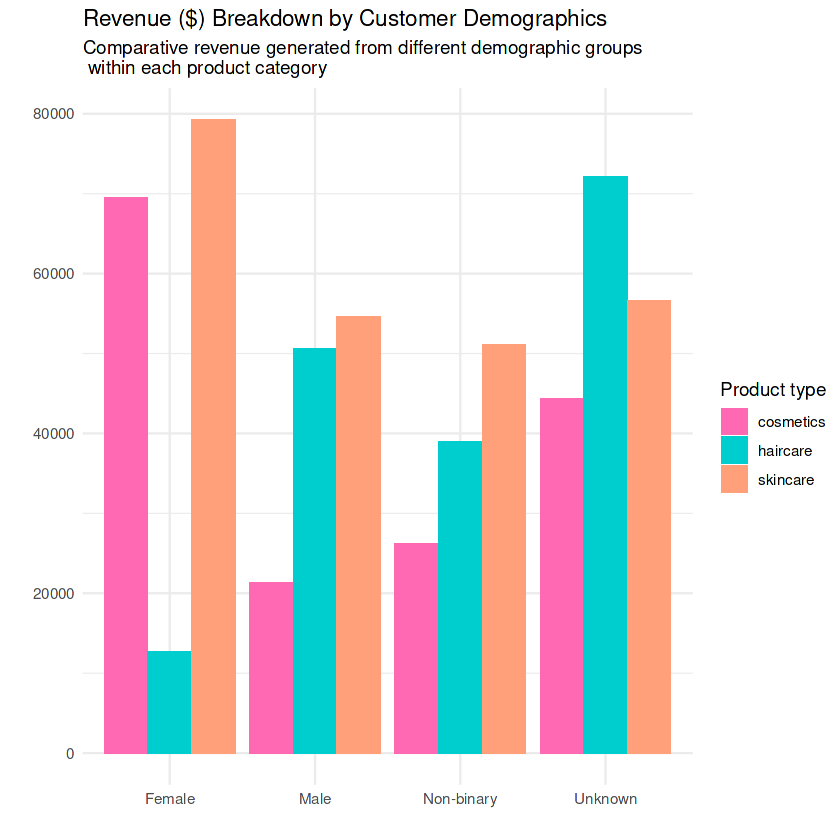

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Define custom colors for product type
my_colors <- c("cosmetics" = "hotpink", "haircare" = "cyan3", "skincare" = "lightsalmon")

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Correlate Revenue Data with Customer Demographics
revenue_performance_demographics <- supply_chain_data %>%
  group_by(`Customer demographics`, `Product type`) %>%
  summarise(`Total Revenue` = sum(`Revenue generated`, na.rm = TRUE)) %>%
  ungroup()

# Creat bar chart for Revenue by Customer Demographics and Product Type
Revenue_by_Customer_Demographics_and_Product_Type <- ggplot(revenue_performance_demographics, aes(x = `Customer demographics`, y = `Total Revenue`, fill = `Product type`)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  scale_fill_manual(values = my_colors) +
  labs(title = "Revenue ($) Breakdown by Customer Demographics", subtitle = "Comparative revenue generated from different demographic groups\n within each product category", x = " ", y = " ") +
  theme_minimal()

print(Revenue_by_Customer_Demographics_and_Product_Type)

# Save the plot with custom dimensions
ggsave("2-2 Revenue_by_Customer_Demographics_and_Product_Type.png", plot = Revenue_by_Customer_Demographics_and_Product_Type, width = 8, height = 6)

# Product and Customer Analysis: **3. Predictive Analytics for Future Planning**

#### * Note: Demand Forecasting usually relies on historical sales data. Lacking that, this analysis uses 'Availability' in relation to 'Price', 'Sales Volume', and 'Lead Times' for predictive insights.                        
#### **Insightful Comparisons: Using Liner regression to analyse how Availability interacts with Price, Number of Products Sold, and Lead Times offers strategic insights for inventory management and forecasting, beneficial even when historical sales data is not available.**
#### * Note: Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables.

In [ ]:
# Load necessary libraries
library(readr)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Create linear regression model
model <- lm(Availability ~ Price + `Number of products sold` + `Lead times`, data = supply_chain_data)

# Summary of the model
summary(model)

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Call:
lm(formula = Availability ~ Price + `Number of products sold` + 
    `Lead times`, data = supply_chain_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.284 -26.599  -0.941  30.873  57.258 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               33.681216   9.279694   3.630 0.000457 ***
Price                      0.010566   0.098827   0.107 0.915080    
`Number of products sold`  0.009668   0.010141   0.953 0.342788    
`Lead times`               0.610236   0.350969   1.739 0.085290 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.62 on 96 degrees of freedom
Multiple R-squared:  0.03829,	Adjusted R-squared:  0.008233 
F-statistic: 1.274 on 3 and 96 DF,  p-value: 0.2877


#### Scatter plot for Price vs Availability

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


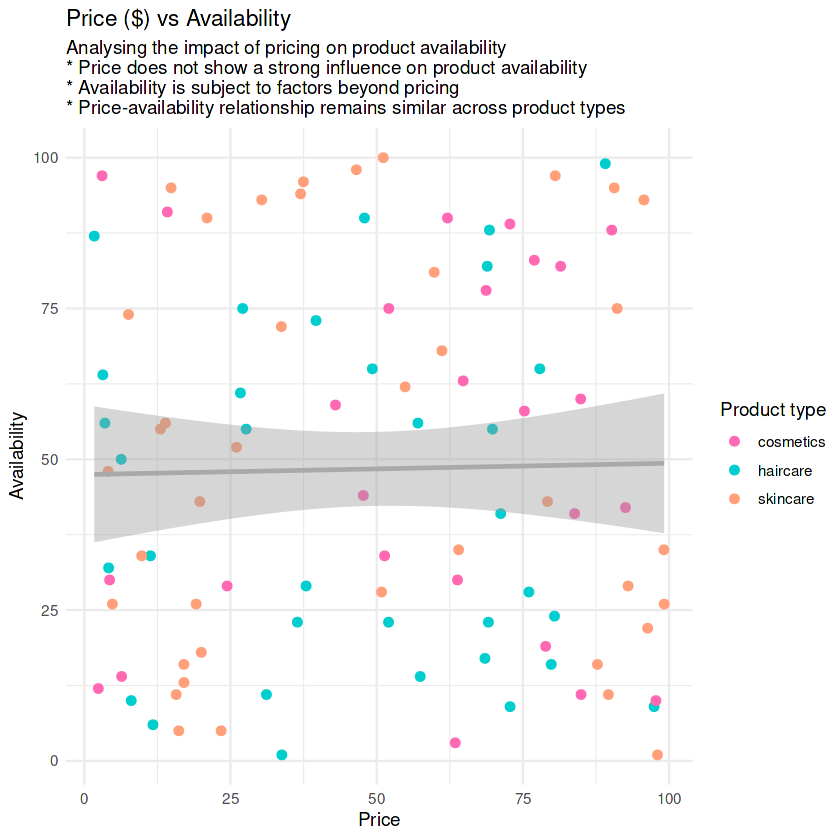

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Define custom colors for product type
my_colors <- c("cosmetics" = "hotpink", "haircare" = "cyan3", "skincare" = "lightsalmon")

# Create scatter plot for Price vs Availability
 Price_vs_Availability <- ggplot(supply_chain_data, aes(x = Price, y = Availability, color = `Product type`)) +
  geom_point(size=2) +
  geom_smooth(method = "lm", color = "darkgrey") +
  theme_minimal() +
  scale_color_manual(values = my_colors) +
  labs(
    title = "Price ($) vs Availability",
    subtitle = "Analysing the impact of pricing on product availability\n* Price does not show a strong influence on product availability\n* Availability is subject to factors beyond pricing\n* Price-availability relationship remains similar across product types"
      )

print(Price_vs_Availability)

# Save the plot with custom dimensions
ggsave("3-1 Price_vs_Availability.png", plot = Price_vs_Availability, width = 8, height = 6)

#### Scatter plot for Number of products sold vs Availability

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


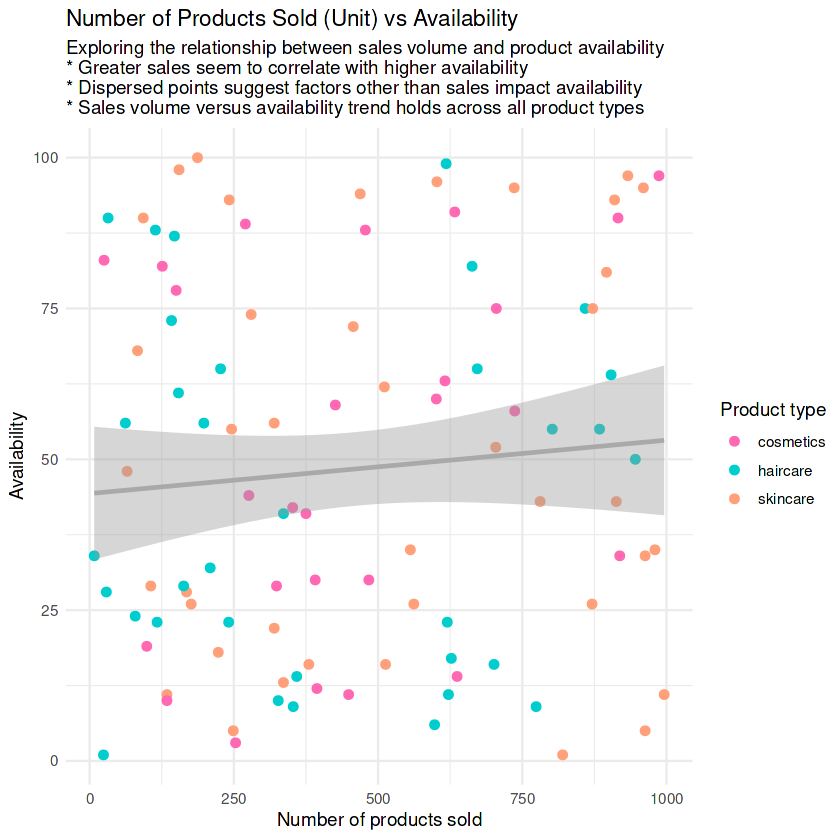

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Define custom colors for product type
my_colors <- c("cosmetics" = "hotpink", "haircare" = "cyan3", "skincare" = "lightsalmon")

# Create scatter plot for Number of products sold vs Availability
  Number_of_Products_Sold_vs_Availability <- ggplot(supply_chain_data, aes(x = `Number of products sold`, y = Availability, color = `Product type`)) +
  geom_point(size=2) +
  geom_smooth(method = "lm", color = "darkgrey") +
  theme_minimal() +
  scale_color_manual(values = my_colors) +
  labs(
    title = "Number of Products Sold (Unit) vs Availability",
    subtitle = "Exploring the relationship between sales volume and product availability\n* Greater sales seem to correlate with higher availability\n* Dispersed points suggest factors other than sales impact availability\n* Sales volume versus availability trend holds across all product types"
)

print(Number_of_Products_Sold_vs_Availability)

# Save the plot with custom dimensions
ggsave("3-2 Number_of_Products_Sold_vs_Availability.png", plot = Number_of_Products_Sold_vs_Availability, width = 8, height = 6)

#### Scatter plot for Lead times vs Availability

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


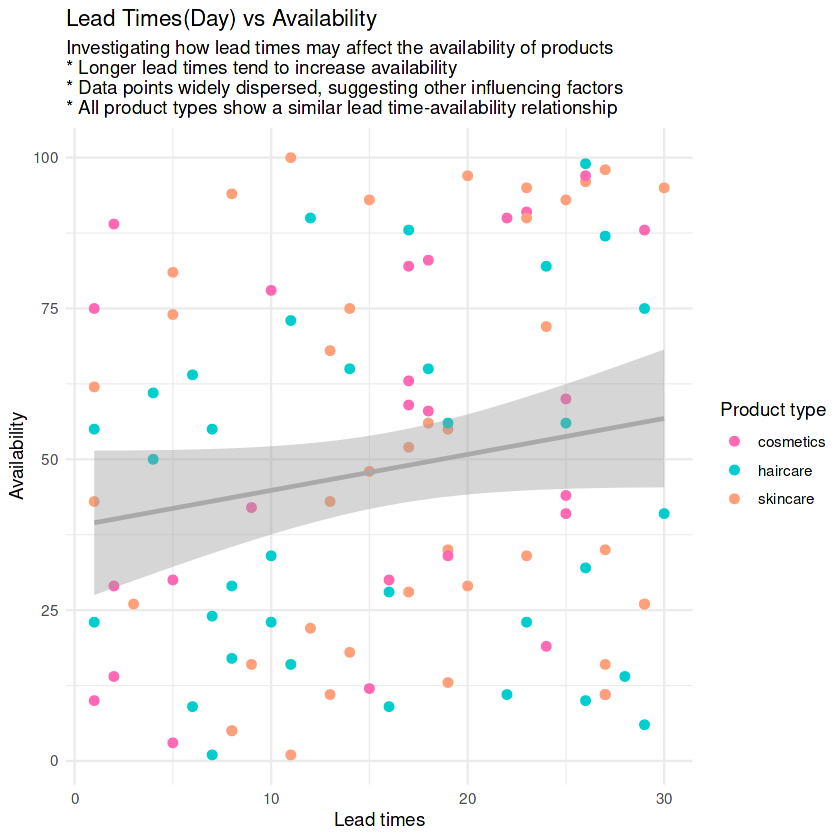

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Define custom colors for product type
my_colors <- c("cosmetics" = "hotpink", "haircare" = "cyan3", "skincare" = "lightsalmon")

# Create scatter plot for Lead times vs Availability
Lead_Times_vs_Availability <- ggplot(supply_chain_data, aes(x = `Lead times`, y = Availability, color = `Product type`)) +
  geom_point(size=2) +
  geom_smooth(method = "lm", color = "darkgrey") +
  theme_minimal() +
  scale_color_manual(values = my_colors) +
  labs(
    title = "Lead Times(Day) vs Availability",
    subtitle = "Investigating how lead times may affect the availability of products\n* Longer lead times tend to increase availability\n* Data points widely dispersed, suggesting other influencing factors\n* All product types show a similar lead time-availability relationship"
)

print(Lead_Times_vs_Availability)

# Save the plot with custom dimensions
ggsave("3-3 Lead_Times_vs_Availability.png", plot = Lead_Times_vs_Availability, width = 8, height = 6)

# Supply Chain Analysis: **1. Supply Chain Performance Evaluation**
#### **1. Lead Time Scrutiny: Examine both Lead Times and Manufacturing Lead Time for potential delays.**


Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


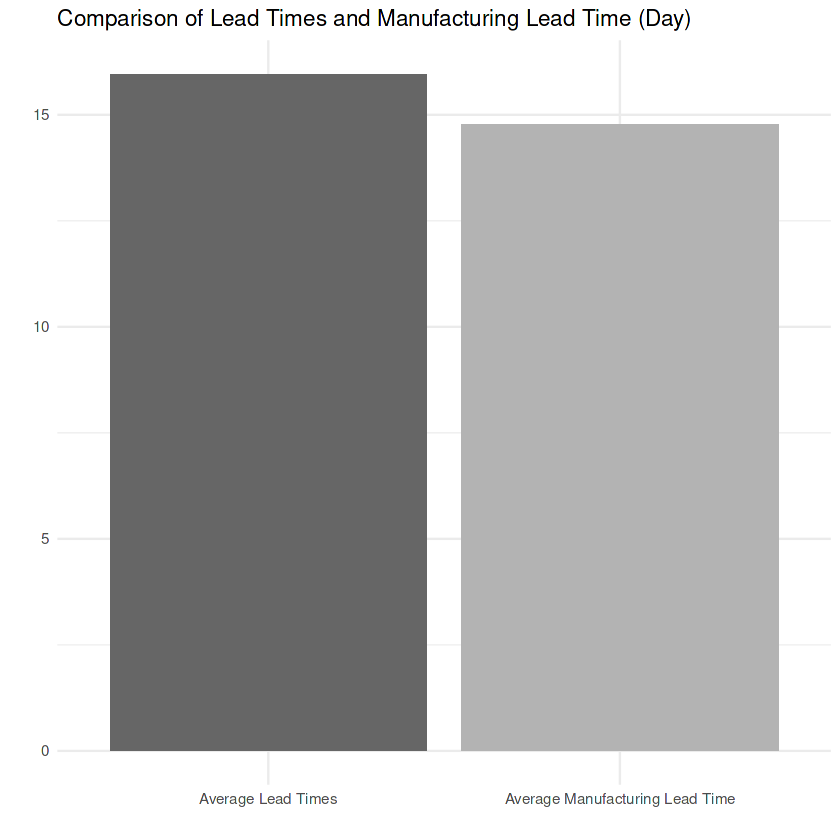

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Lead Time Analysis - Comparing Lead times and Manufacturing lead time
lead_time_analysis <- supply_chain_data %>%
  summarise(
    Average_Lead_Times = mean(`Lead times`, na.rm = TRUE),
    Average_Manufacturing_Lead_Time = mean(`Manufacturing lead time`, na.rm = TRUE)
  )

# Create a data frame for visualisation
Average_Lead_Times_vs_Average_Manufacturing_Lead_Time <- data.frame(
  Category = c("Average Lead Times", "Average Manufacturing Lead Time"),
  Value = c(lead_time_analysis$Average_Lead_Times, lead_time_analysis$Average_Manufacturing_Lead_Time)
)

# Create bar charts for summarized lead times
 Average_Lead_Times_vs_Average_Manufacturing_Lead_Time <- ggplot(Average_Lead_Times_vs_Average_Manufacturing_Lead_Time, aes(x = Category, y = Value, fill = Category)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Comparison of Lead Times and Manufacturing Lead Time (Day)",
       x = " ",
       y = " ") +
  theme_minimal() +
  theme(legend.position = "none")+
 scale_fill_grey(start = 0.4, end = 0.7)

print(Average_Lead_Times_vs_Average_Manufacturing_Lead_Time)

# Save the plot with custom dimensions
ggsave("4-1 Average_Lead_Times_vs_Average_Manufacturing_Lead_Time.png", plot = Average_Lead_Times_vs_Average_Manufacturing_Lead_Time, width = 8, height = 6)

#### **2. Supplier Assessment: Evaluate suppliers based on Lead Times, Defect Rates, and Inspection Outcomes.**
#### This analysis utilises 'lead times' and 'manufacturing lead time' data as provided, despite observed discrepancies. The use of both metrics aims to offer a broad perspective on supplier performance for illustrative purposes, acknowledging the need for further data clarification.

#### **Preparation for Data Visualisations**
#### Create a dataframe named 'supplier_performance' to be used for visualisations of Lead Times, Defect Rates, and Inspection Outcomes. Please ensure that this dataframe is correctly set up by running the associated code chunks before attempting to execute any subsequent code sections in this analysis.

In [ ]:
# Load necessary libraries
library(readr)
library(tidyr)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(grid)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Supplier Performance Analysis
supplier_performance <- supply_chain_data %>%
  group_by(`Supplier name`) %>%
  summarise(
    Average_Lead_Times = mean(`Lead times`, na.rm = TRUE),
    Average_Manufacturing_Lead_Time = mean(`Manufacturing lead time`, na.rm = TRUE),
    Average_Defect_Rate = mean(`Defect rates`, na.rm = TRUE),
    Pass_Rate = mean(`Inspection results` == "Pass", na.rm = TRUE) * 100,
    Fail_Rate = mean(`Inspection results` == "Fail", na.rm = TRUE) * 100,
    Results_Pending = mean(`Inspection results` == "Pending", na.rm = TRUE) * 100
  ) %>%
  ungroup()

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Average Lead Times by Supplier

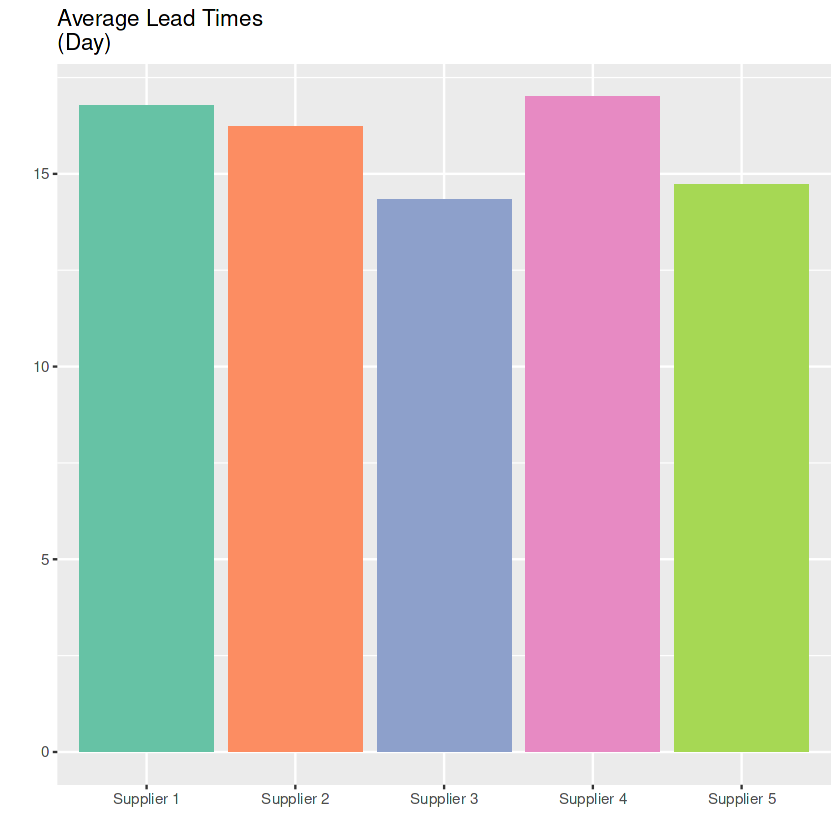

In [ ]:
# Reshaping the data to long format using pivot_longer
long_format_data <- supplier_performance %>%
  pivot_longer(cols = c("Pass_Rate", "Fail_Rate", "Results_Pending"),
               names_to = "Inspection_Result",
               values_to = "Rate")

# Create bar chart for Lead Times
Lead_Times_by_Supplier <- ggplot(supplier_performance, aes(x = `Supplier name`, y = Average_Lead_Times, fill = `Supplier name`)) +
  geom_bar(stat = "identity") +
    scale_fill_brewer(palette = "Set2") +
  labs(
    title = "Average Lead Times\n(Day)",
    x = "",
    y = "",
    ) +
  theme(
    legend.position = "none",
  )

print(Lead_Times_by_Supplier)

# Save the plot with custom dimensions
ggsave("4-2 Lead_Times_by_Supplier.png", plot = Lead_Times_by_Supplier, width = 8, height = 6)

#### Average Manufacturing Lead Time by Supplier

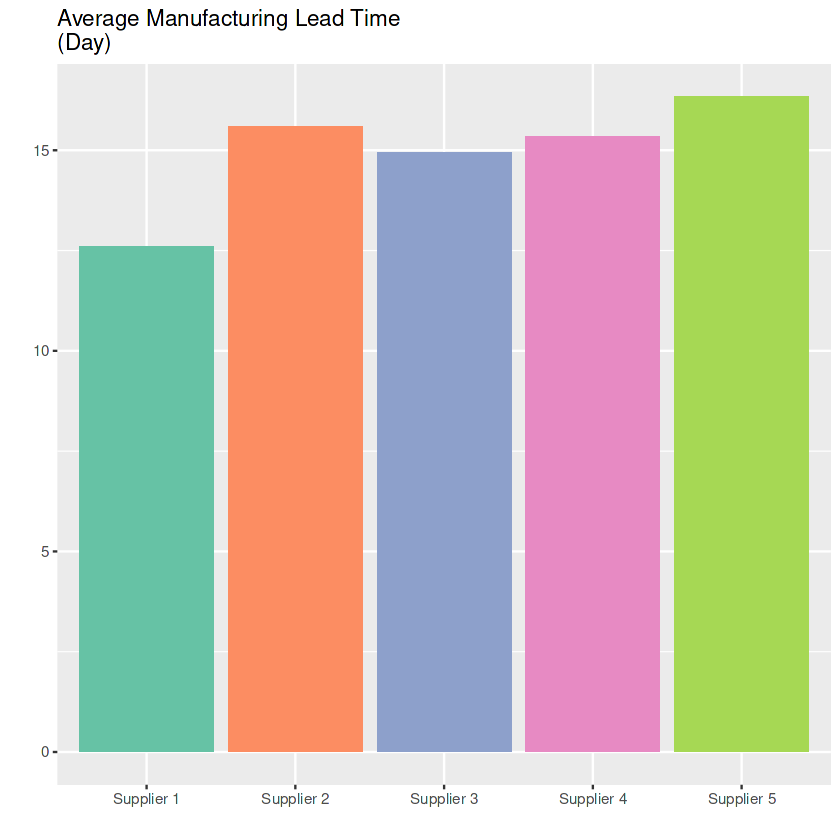

In [ ]:
# Reshaping the data to long format using pivot_longer
long_format_data <- supplier_performance %>%
  pivot_longer(cols = c("Pass_Rate", "Fail_Rate", "Results_Pending"),
               names_to = "Inspection_Result",
               values_to = "Rate")

# Create bar chart for Manufacturing Lead Time
Manufacturing_Lead_Time_by_Supplier <- ggplot(supplier_performance, aes(x = `Supplier name`, y = Average_Manufacturing_Lead_Time, fill = `Supplier name`)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Set2") +
  labs(
    title = "Average Manufacturing Lead Time \n(Day)",
    x = "",
    y = "",
     ) +
  theme(
    legend.position = "none",
   )
print(Manufacturing_Lead_Time_by_Supplier)

# Save the plot with custom dimensions
ggsave("4-3 Manufacturing_Lead_Time_by_Supplier.png", plot = Manufacturing_Lead_Time_by_Supplier, width = 8, height = 6)

#### **Comparison of Average Lead Times and Average Manufacturing Lead Times (Day) by Supplier**

TableGrob (2 x 2) "arrange": 3 grobs
  z     cells    name                 grob
1 1 (2-2,1-1) arrange       gtable[layout]
2 2 (2-2,2-2) arrange       gtable[layout]
3 3 (1-1,1-2) arrange text[GRID.text.1375]


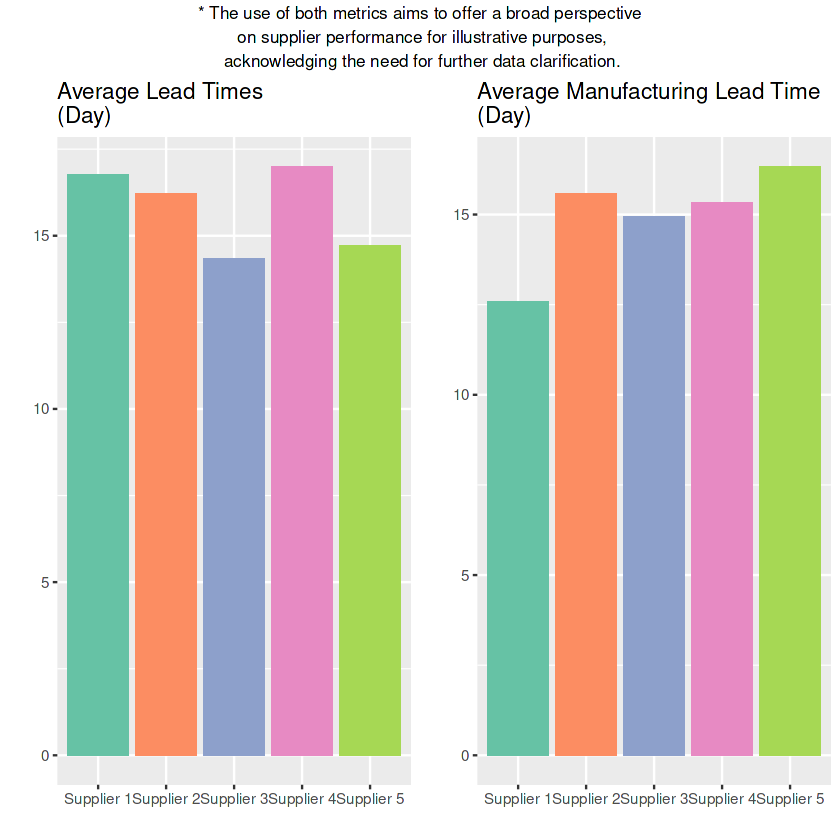

In [ ]:
# Reshaping the data to long format using pivot_longer
long_format_data <- supplier_performance %>%
  pivot_longer(cols = c("Pass_Rate", "Fail_Rate", "Results_Pending"),
               names_to = "Inspection_Result",
               values_to = "Rate")

# Combine the two charts
Lead_Times_vs_Manufacturing_Lead_Time_by_Supplier <- grid.arrange(
  Lead_Times_by_Supplier,
  Manufacturing_Lead_Time_by_Supplier,
  ncol = 2,
  top = textGrob("* The use of both metrics aims to offer a broad perspective\n on supplier performance for illustrative purposes,\n acknowledging the need for further data clarification.",
                    hjust = 0.5, # Center Justified
                    x = 0.5, # Center Position
                    gp = gpar(fontsize = 10))
)

print(Lead_Times_vs_Manufacturing_Lead_Time_by_Supplier)

# Save the plot with custom dimensions
ggsave("4-4 Lead_Times_vs_Manufacturing_Lead_Time_by_Supplier.png", plot = Lead_Times_vs_Manufacturing_Lead_Time_by_Supplier, width = 8, height = 6)

#### Inspection Rates(Results) by Supplier

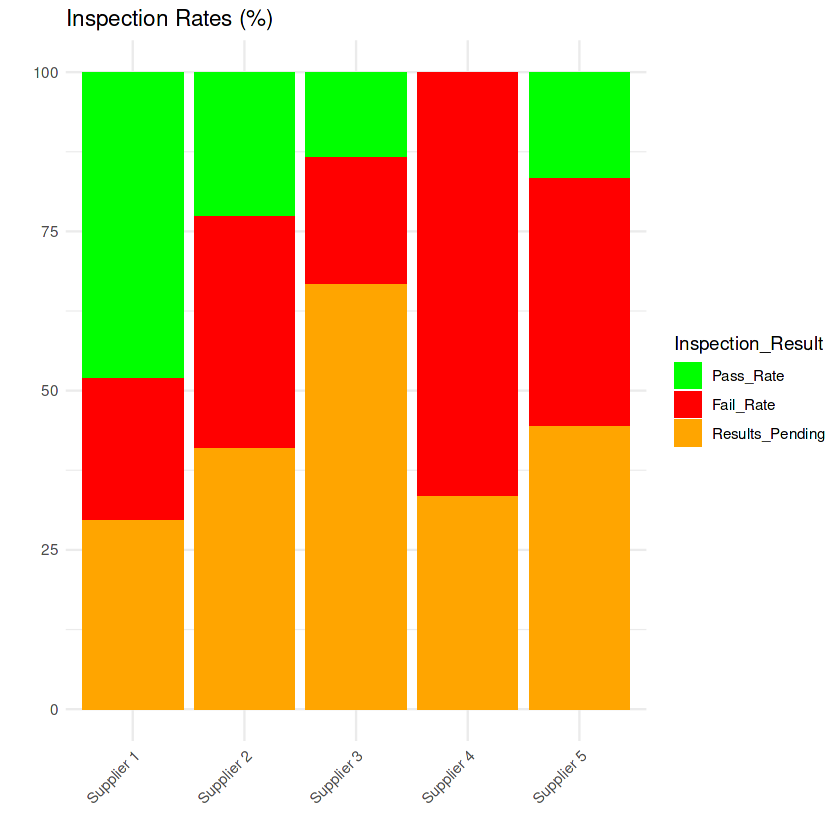

In [ ]:
# Reshaping the data to long format
long_format_data <- supplier_performance %>%
  gather(key = "Inspection_Result", value = "Rate",
         Pass_Rate, Fail_Rate, Results_Pending)

# Adjust the levels of Inspection_Result to control the order in the plot and legend
long_format_data$Inspection_Result <- factor(long_format_data$Inspection_Result,
                                             levels = c("Pass_Rate", "Fail_Rate", "Results_Pending"))

# Create stacked bar chart for Inspection Rates by Supplier
Inspection_Rates_by_Supplier <- ggplot(long_format_data, aes(x = `Supplier name`, y = Rate, fill = Inspection_Result)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(values = c("Pass_Rate" = "green", "Fail_Rate" = "red", "Results_Pending" = "orange")) +
  labs(title = "Inspection Rates (%)", x = " ", y = " ") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(Inspection_Rates_by_Supplier)

# Save the plot with custom dimensions
ggsave("4-5 Inspection_Rates_by_Supplier .png", plot = Inspection_Rates_by_Supplier, width = 8, height = 6)



#### Average Defect Rate by Supplier

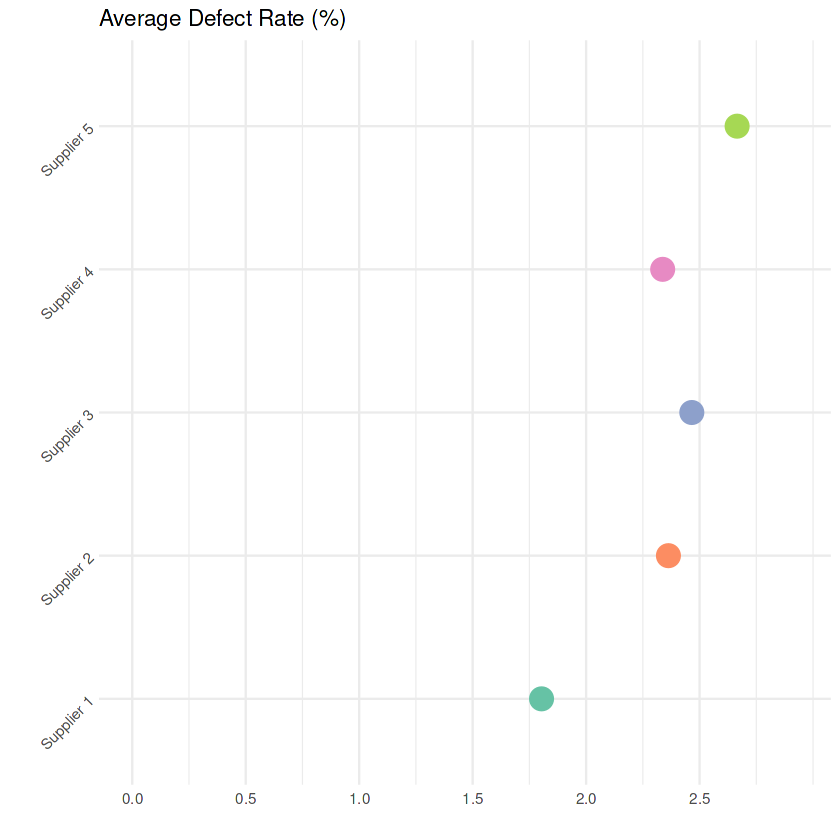

In [ ]:
# Reshaping the data to long format
long_format_data <- supplier_performance %>%
  gather(key = "Inspection_Result", value = "Rate",
         Pass_Rate, Fail_Rate, Results_Pending)

# Adjust the levels of Inspection_Result to control the order in the plot and legend
long_format_data$Inspection_Result <- factor(long_format_data$Inspection_Result,
                                             levels = c("Pass_Rate", "Fail_Rate", "Results_Pending"))

# Create dot plot for Average Defect Rate by Supplier
Average_Defect_Rate_by_Supplier <- ggplot(supplier_performance, aes(x = Average_Defect_Rate, y = `Supplier name`, color = `Supplier name`)) +
  geom_point(size = 6) +
  labs(title = "Average Defect Rate (%)", x = "", y = " ") +
  theme_minimal() +
  scale_color_brewer(palette = "Set2") +
  theme(
    legend.position = "none",
    axis.text.y = element_text(angle = 45, hjust = 1)
  ) +
  scale_x_continuous(
    limits = c(0, max(supplier_performance$Average_Defect_Rate) * 1.1), # Set upper limit to 110% of the max value
    breaks = seq(0, max(supplier_performance$Average_Defect_Rate) * 1.1, by = 0.5) # Adjust the breaks accordingly
  )

print(Average_Defect_Rate_by_Supplier)

# Save the plot with custom dimensions
ggsave("4-6 Average_Defect_Rate_by_Supplier.png", plot = Average_Defect_Rate_by_Supplier, width = 8, height = 6)


#### **Comparison of Inspection Rates(Results) and Average Defect Rate by Supplier**

TableGrob (2 x 2) "arrange": 3 grobs
  z     cells    name                 grob
1 1 (2-2,1-1) arrange       gtable[layout]
2 2 (2-2,2-2) arrange       gtable[layout]
3 3 (1-1,1-2) arrange text[GRID.text.1643]


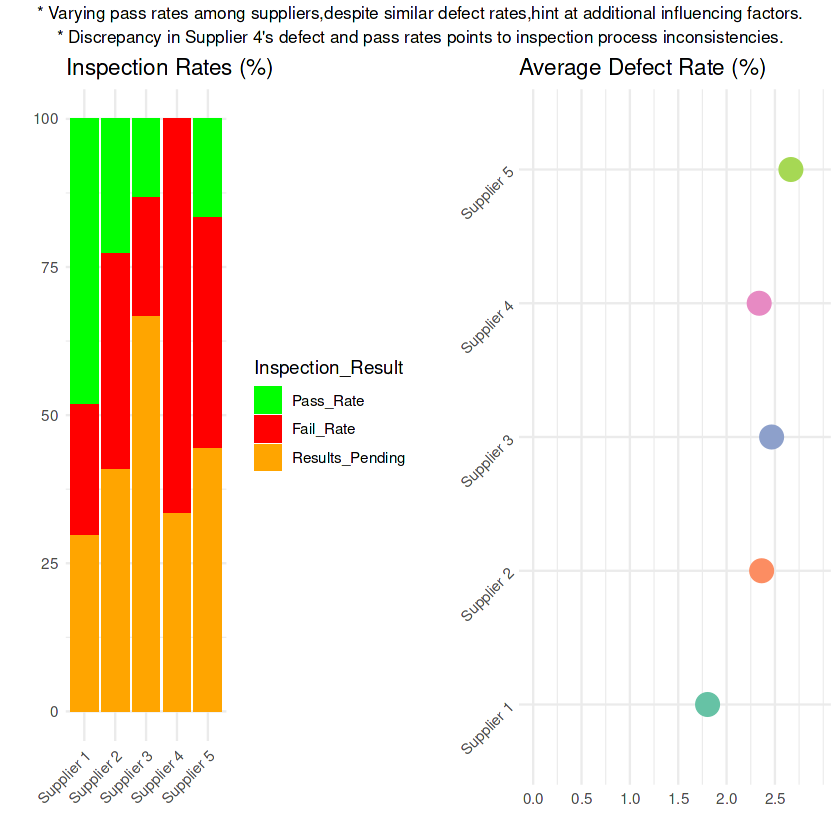

In [ ]:
# Reshaping the data to long format
long_format_data <- supplier_performance %>%
  gather(key = "Inspection_Result", value = "Rate",
         Pass_Rate, Fail_Rate, Results_Pending)

# Adjust the levels of Inspection_Result to control the order in the plot and legend
long_format_data$Inspection_Result <- factor(long_format_data$Inspection_Result,
                                             levels = c("Pass_Rate", "Fail_Rate", "Results_Pending"))

# Combine two charts
  Inspection_Rates_vs_Average_Defect_Rate<- grid.arrange(
  Inspection_Rates_by_Supplier,
   Average_Defect_Rate_by_Supplier,
   ncol = 2,
   top = textGrob("* Varying pass rates among suppliers,despite similar defect rates,hint at additional influencing factors.\n* Discrepancy in Supplier 4's defect and pass rates points to inspection process inconsistencies.",
                     gp = gpar(fontsize = 10),
                     vjust = 0.5)
)

print(Inspection_Rates_vs_Average_Defect_Rate)

# Save the plot with custom dimensions
ggsave("4-7 Inspection_Rates_vs_Average_Defect_Rate.png", plot = Inspection_Rates_vs_Average_Defect_Rate, width = 8, height = 6)


#### **3. Supplier Risk Assessment**
#### Analyse and visualise supplier risks by comparing Lead Times, Defect Rates, and Inspection Outcomes to identify potential vulnerabilities in the supply chain.

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 5 × 8
  `Supplier name` Average_Lead_Times SD_Lead_Times Average_Defect_Rate
  <chr>                        <dbl>         <dbl>               <dbl>
1 Supplier 1                    16.8          8.59                1.80
2 Supplier 2                    16.2          8.81                2.36
3 Supplier 3                    14.3          8.76                2.47
4 Supplier 4                    17            8.90                2.34
5 Supplier 5                    14.7          9.60                2.67
# ℹ 4 more variables: SD_Defect_Rate <dbl>, Pass_Rate <dbl>, Fail_Rate <dbl>,
#   Pending_Rate <dbl>


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


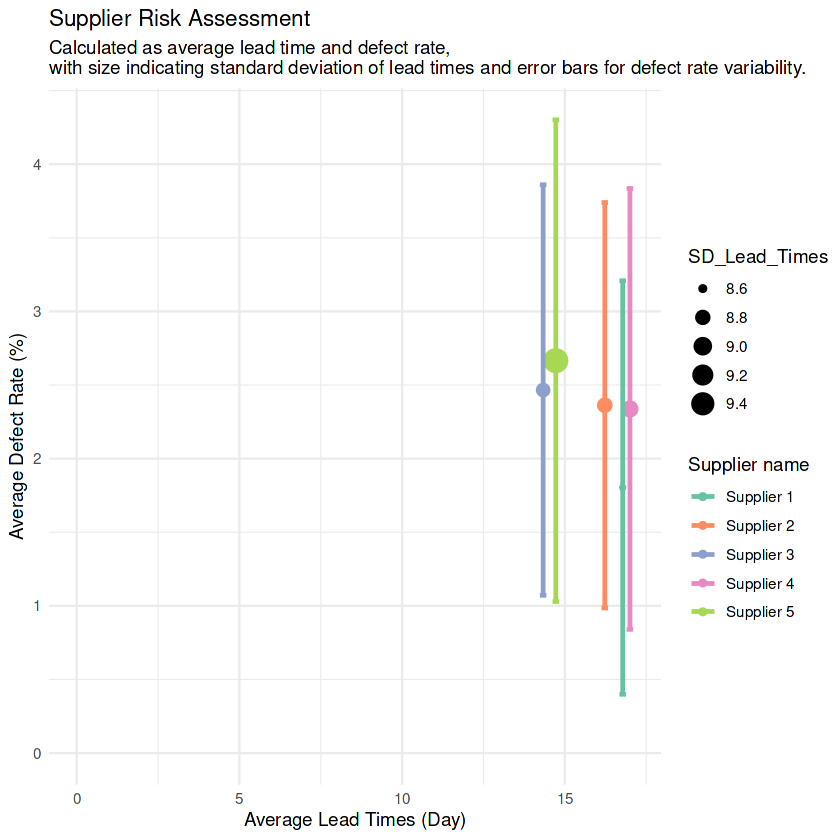

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Risk Assessment Analysis
risk_assessment <- supply_chain_data %>%
  group_by(`Supplier name`) %>%
  summarise(
    Average_Lead_Times = mean(`Lead times`, na.rm = TRUE),
    SD_Lead_Times = sd(`Lead times`, na.rm = TRUE), # Standard Deviation of Lead Times
    Average_Defect_Rate = mean(`Defect rates`, na.rm = TRUE),
    SD_Defect_Rate = sd(`Defect rates`, na.rm = TRUE), # Standard Deviation of Defect Rates
    Pass_Rate = mean(`Inspection results` == "Pass", na.rm = TRUE) * 100,
    Fail_Rate = mean(`Inspection results` == "Fail", na.rm = TRUE) * 100,
    Pending_Rate = mean(`Inspection results` == "Pending", na.rm = TRUE) * 100
  ) %>%
  ungroup()

# View the risk assessment summary
print(risk_assessment)

# Create chart for Risk Assessment with X and Y axes starting from 0
Risk_Assessment <- ggplot(risk_assessment, aes(x = Average_Lead_Times, y = Average_Defect_Rate, color = `Supplier name`)) +
  geom_point(aes(size = SD_Lead_Times)) +
  geom_errorbar(aes(ymin = Average_Defect_Rate - SD_Defect_Rate, ymax = Average_Defect_Rate + SD_Defect_Rate),
                width = 0.2, # Width of the horizontal line at the end of error bars
                size = 1) + # Thickness of the error bar lines
    labs(title = "Supplier Risk Assessment", subtitle = "Calculated as average lead time and defect rate, \nwith size indicating standard deviation of lead times and error bars for defect rate variability.", x = "Average Lead Times (Day)", y = "Average Defect Rate (%)") +
  scale_color_brewer(palette = "Set2") +
  scale_x_continuous(limits = c(0, NA)) + # Set X-axis to start from 0
  scale_y_continuous(limits = c(0, NA)) + # Set Y-axis to start from 0
  theme_minimal()

print(Risk_Assessment)

# Save the plot with custom dimensions
ggsave("4-8 Risk_Assessment.png", plot = Risk_Assessment, width = 8, height = 6)

# Supply Chain Analysis: **2. Cost Management Analysis**
#### **1. Expense Analysis: Scrutinize Shipping and Manufacturing Costs to identify reduction opportunities**


#### Expense Analysis: Shipping Costs

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'Supplier name'. You can override using the
`.groups` argument.


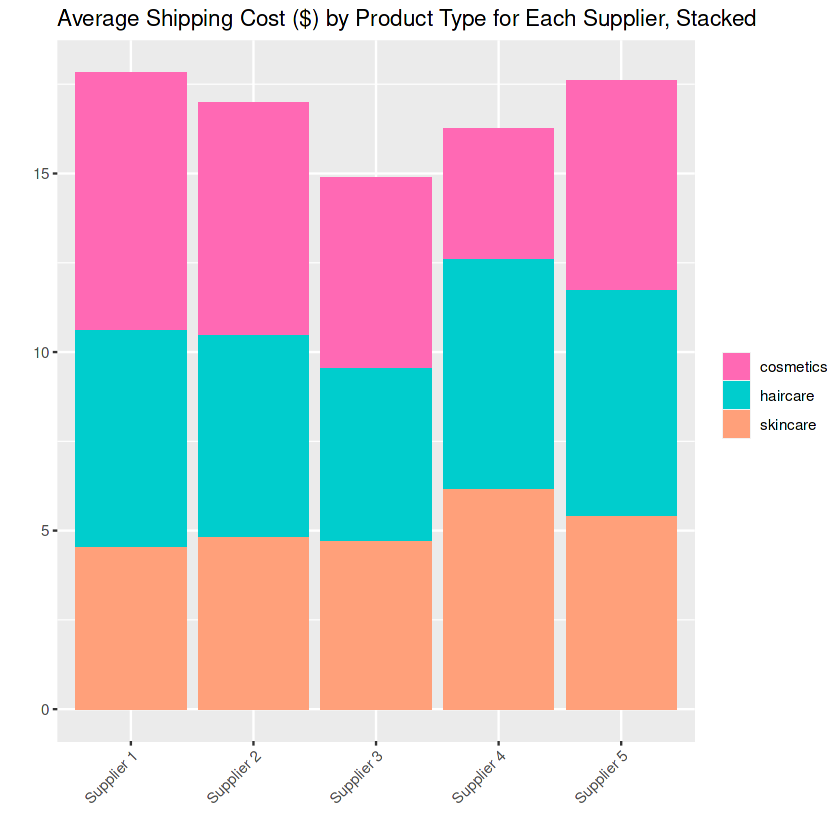

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Define custom colors for product type
my_colors <- c("cosmetics" = "hotpink", "haircare" = "cyan3", "skincare" = "lightsalmon")

# Calculate average shipping costs by Supplier and Product Type
average_shipping_costs <- supply_chain_data %>%
  group_by(`Supplier name`, `Product type`) %>%
  summarise(Average_Shipping_Cost = mean(`Shipping costs`, na.rm = TRUE)) %>%
  ungroup()

# Create the stacked bar chart
Average_Shipping_Costs_by_Supplier_Product_Type <- ggplot(average_shipping_costs, aes(x = `Supplier name`, y = Average_Shipping_Cost, fill = `Product type`)) +
  geom_bar(stat = "identity", position = "stack") +
   scale_fill_manual(values = my_colors) +
  labs(title = "Average Shipping Cost ($) by Product Type for Each Supplier, Stacked",
       x = " ",
       y = " ") +
   theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.title = element_blank())

print(Average_Shipping_Costs_by_Supplier_Product_Type)

# Save the plot with custom dimensions
ggsave("5-1 Average_Shipping_Costs_by_Supplier_Product_Type.png", plot = Average_Shipping_Costs_by_Supplier_Product_Type, width = 8, height = 6)

#### Expense Analysis: Manufacturing Cost


Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'Supplier name'. You can override using the
`.groups` argument.


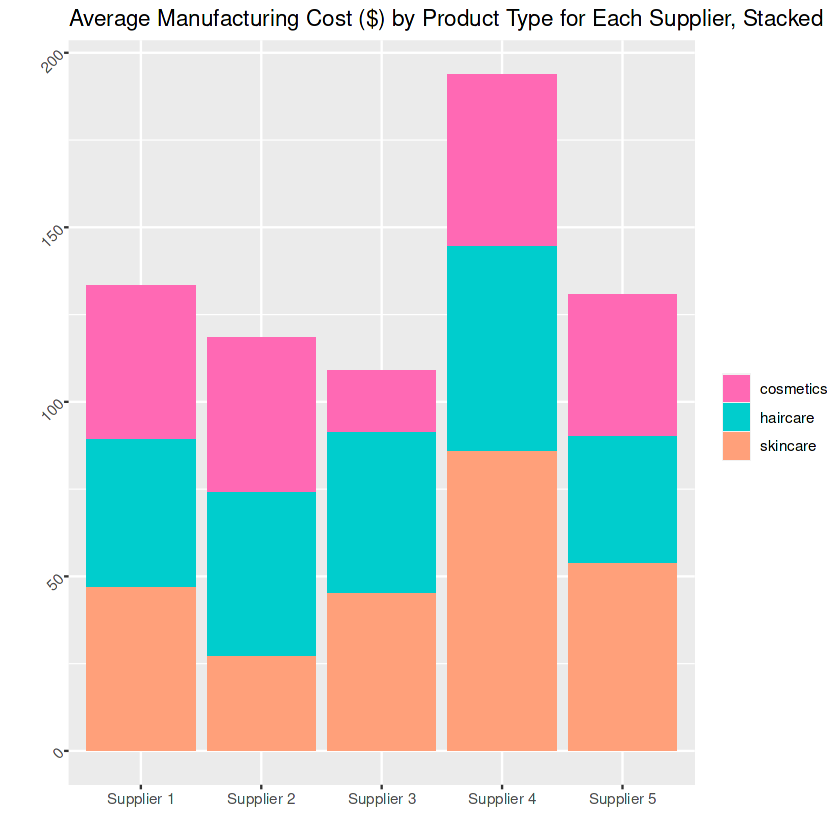

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Define custom colors for product type
my_colors <- c("cosmetics" = "hotpink", "haircare" = "cyan3", "skincare" = "lightsalmon")

# Calculate average manufacturing costs by Supplier and Product Type
average_costs <- supply_chain_data %>%
  group_by(`Supplier name`, `Product type`) %>%
  summarise(Average_Manufacturing_Cost = mean(`Manufacturing costs`, na.rm = TRUE)) %>%
  ungroup()

# Create the stacked horizontal bar chart
Average_Manufacturing_Costs_by_Supplier_Product_Type <- ggplot(average_costs, aes(x = `Supplier name`, y = Average_Manufacturing_Cost, fill = `Product type`)) +
  geom_bar(stat = "identity", position = "stack") +
   scale_fill_manual(values = my_colors) +
  labs(title = "Average Manufacturing Cost ($) by Product Type for Each Supplier, Stacked",
       x = " ",
       y = " ") +
  theme(axis.text.y = element_text(angle = 45, hjust = 1),
        legend.title = element_blank())

print(Average_Manufacturing_Costs_by_Supplier_Product_Type)

# Save the plot with custom dimensions
ggsave("5-2 Average_Manufacturing_Costs_by_Supplier_Product_Type.png", plot = Average_Manufacturing_Costs_by_Supplier_Product_Type, width = 8, height = 6)

#### **Comparison of Shipping and Manufacturing Cost by Product Type and Supplier**

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'Supplier name'. You can override using the
`.groups` argument.


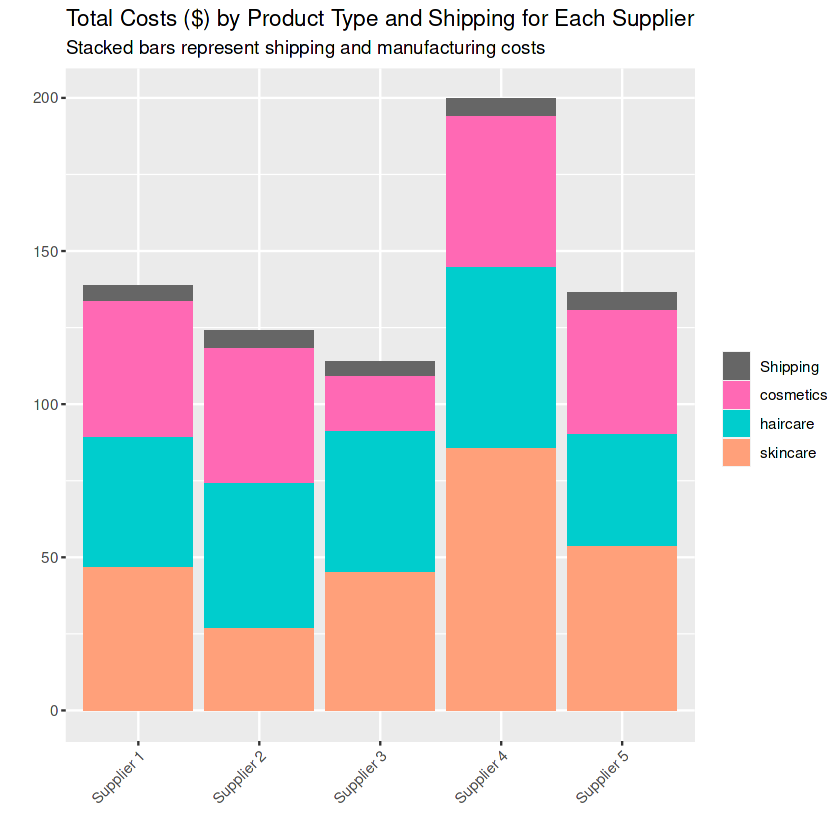

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Define custom colors for shipping cost and product type
my_colors <- c("Shipping" = "grey40", "cosmetics" = "hotpink", "haircare" = "cyan3", "skincare" = "lightsalmon")

# Calculate average manufacturing costs by Supplier and Product Type
average_manufacturing_costs <- supply_chain_data %>%
  group_by(`Supplier name`, `Product type`) %>%
  summarise(Average_Cost = mean(`Manufacturing costs`, na.rm = TRUE)) %>%
  mutate(Type = "Manufacturing") %>%
  ungroup()

# Calculate average shipping costs by Supplier
average_shipping_costs <- supply_chain_data %>%
  group_by(`Supplier name`) %>%
  summarise(Average_Cost = mean(`Shipping costs`, na.rm = TRUE)) %>%
  mutate(`Product type` = "Shipping", Type = "Shipping") %>%
  ungroup()

combined_data <- bind_rows(average_shipping_costs, average_manufacturing_costs)

combined_data$`Product type` <- factor(combined_data$`Product type`, levels = c("Shipping", "cosmetics", "haircare", "skincare"))

# Create the stacked bar chart with manufacturing and shipping costs
Average_Shipping_and_Manufacturing_Costs <- ggplot(combined_data, aes(x = `Supplier name`, y = Average_Cost, fill = `Product type`)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(values = my_colors) +
  labs(title = "Total Costs ($) by Product Type and Shipping for Each Supplier",
       subtitle = "Stacked bars represent shipping and manufacturing costs",
       x = " ",
       y = " ") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.title = element_blank())

print(Average_Shipping_and_Manufacturing_Costs)

# Save the plot with custom dimensions
ggsave("5-3 Average_Shipping_and_Manufacturing_Costs.png", plot = Average_Shipping_and_Manufacturing_Costs, width = 8, height = 6)

#### **2.Profitability Review: Contrast Costs with Revenue to assess overall profitability (Calculated by subtracting average costs from average revenue).**
#### Total Profit by Product Type

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'Supplier name'. You can override using the
`.groups` argument.


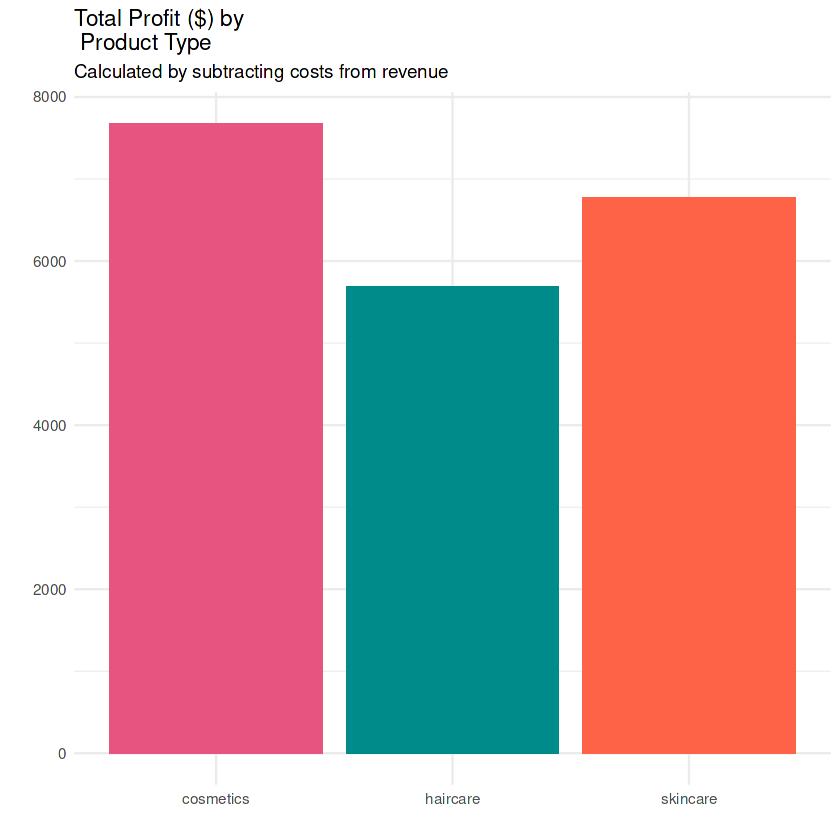

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(grid)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Define custom colors for product type in darker shades to represent profit
 my_colors_darker <- c("cosmetics" = "#E75480",  # Darker shade of hotpink
                      "haircare" = "#008B8B",   # Darker shade of cyan3
                     "skincare" = "#FF6347")   # Darker shade of lightsalmon

# Calculate profit by subtracting average manufacturing and shipping costs from average revenue
profitability_analysis <- supply_chain_data %>%
  group_by(`Supplier name`, `Product type`) %>%
  summarise(
    Average_Revenue = mean(`Revenue generated`, na.rm = TRUE),
    Average_Costs = mean(`Manufacturing costs` + `Shipping costs`, na.rm = TRUE),
    Profit = Average_Revenue - Average_Costs
  ) %>%
  ungroup()

# Create a bar chart to visualise the profit for each product type
Profit_by_Product_Type <-
  ggplot(profitability_analysis, aes(x = `Product type`, y = Profit, fill = `Product type`)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Total Profit ($) by\n Product Type",
       subtitle = "Calculated by subtracting costs from revenue",
       x = " ", y = " ") +
  theme_minimal() +
  theme(legend.position = "none") +
  scale_fill_manual(values = my_colors_darker)

print(Profit_by_Product_Type)

# Save the plot with custom dimensions
ggsave("5-4 Profit_by_Product_Type.png", plot = Profit_by_Product_Type, width = 8, height = 6)

#### Profit by Product Type and Supplier

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'Supplier name'. You can override using the
`.groups` argument.


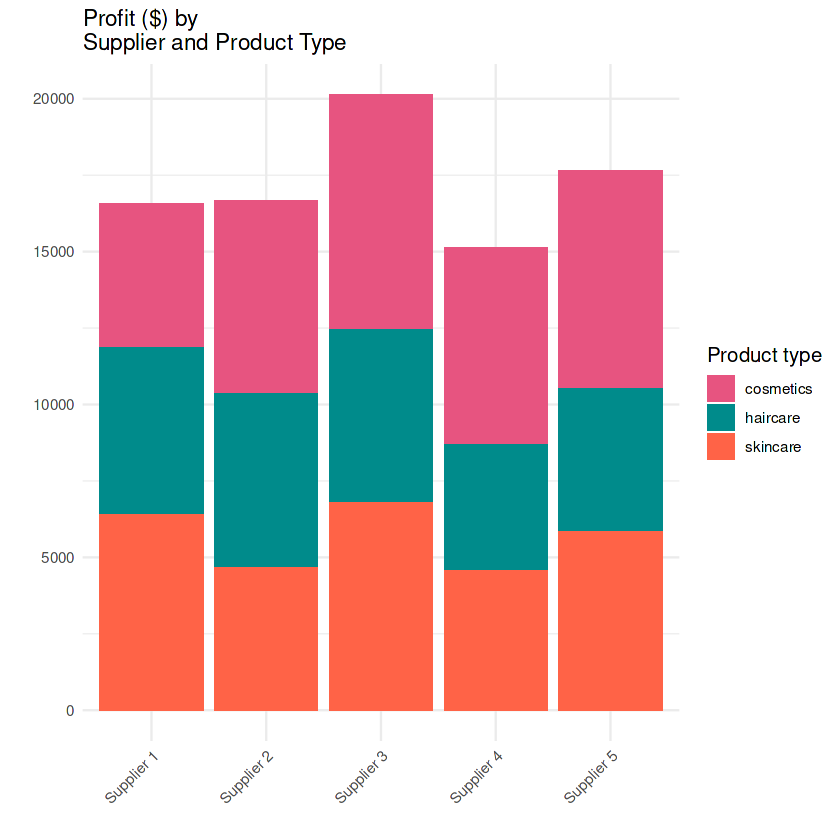

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(grid)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Define custom colors for product type in darker shades to represent profit
 my_colors_darker <- c("cosmetics" = "#E75480",  # Darker shade of hotpink
                      "haircare" = "#008B8B",   # Darker shade of cyan3
                     "skincare" = "#FF6347")   # Darker shade of lightsalmon

# Calculate profit by subtracting average manufacturing and shipping costs from average revenue
profitability_analysis <- supply_chain_data %>%
  group_by(`Supplier name`, `Product type`) %>%
  summarise(
    Average_Revenue = mean(`Revenue generated`, na.rm = TRUE),
    Average_Costs = mean(`Manufacturing costs` + `Shipping costs`, na.rm = TRUE),
    Profit = Average_Revenue - Average_Costs
  ) %>%
  ungroup()

# Create a stacked bar chart to visualise the profit for each supplier and product type
Profit_by_Supplier_Product_Type <- ggplot(profitability_analysis, aes(x = `Supplier name`, y = Profit, fill = `Product type`)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(values = my_colors_darker) +
  labs(
    title = "Profit ($) by \nSupplier and Product Type",
    x = "",
    y = " "
  ) +
  theme_minimal() +
   theme(axis.text.x = element_text(angle = 45, hjust = 1),
    legend.title = element_text(size = 12)
  )

print(Profit_by_Supplier_Product_Type)

# Save the plot with custom dimensions
ggsave("5-5 Profit_by_Supplier_Product_Type.png", plot = Profit_by_Supplier_Product_Type, width = 8, height = 6)

#### **Comparative Analysis of Profit: By Product Type Overall and by Supplier**

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TableGrob (2 x 2) "arrange": 3 grobs
  z     cells    name                 grob
1 1 (2-2,1-1) arrange       gtable[layout]
2 2 (2-2,2-2) arrange       gtable[layout]
3 3 (1-1,1-2) arrange text[GRID.text.2529]


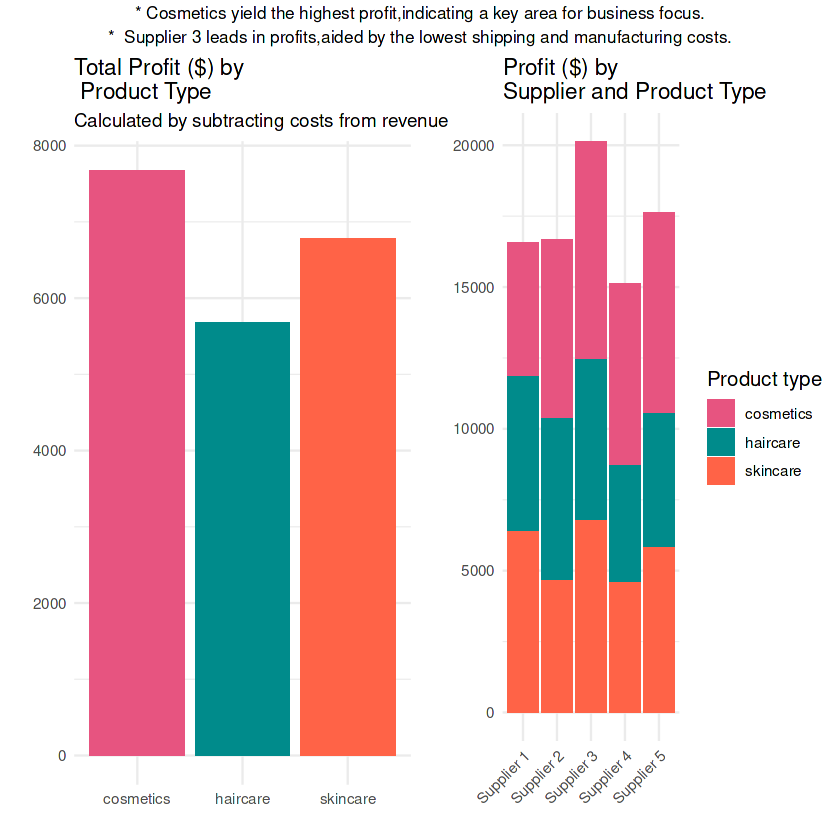

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(grid)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Define custom colors for product type in darker shades to represent profit
 my_colors_darker <- c("cosmetics" = "#E75480",  # Darker shade of hotpink
                      "haircare" = "#008B8B",   # Darker shade of cyan3
                     "skincare" = "#FF6347")   # Darker shade of lightsalmon

# Combine two charts
Profit_Overview <- grid.arrange(
   Profit_by_Product_Type,
   Profit_by_Supplier_Product_Type,
   ncol = 2,
   top = textGrob(
       "* Cosmetics yield the highest profit,indicating a key area for business focus.\n*  Supplier 3 leads in profits,aided by the lowest shipping and manufacturing costs.",
       gp = gpar(fontsize = 10)
   )
)
print(Profit_Overview)

# Save the plot with custom dimensions
ggsave("5-6 Profit_Overview.png", plot = Profit_Overview, width = 8, height = 6)

# Supply Chain Analysis: **3. Logistics Optimization Study**

#### **1. Average Shipping Costs by Carrier and Mode: Calculating and comparing average shipping costs across carriers and transport methods.**

#### *Note: Study excludes 'Correlation of Shipping Costs with Other Factors' due to data containing 'defect rate' mainly linked to manufacturing, not shipping. Focus remains on direct shipping cost analysis, omitting manufacturing quality-related factors.


Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'Shipping carriers'. You can override using
the `.groups` argument.


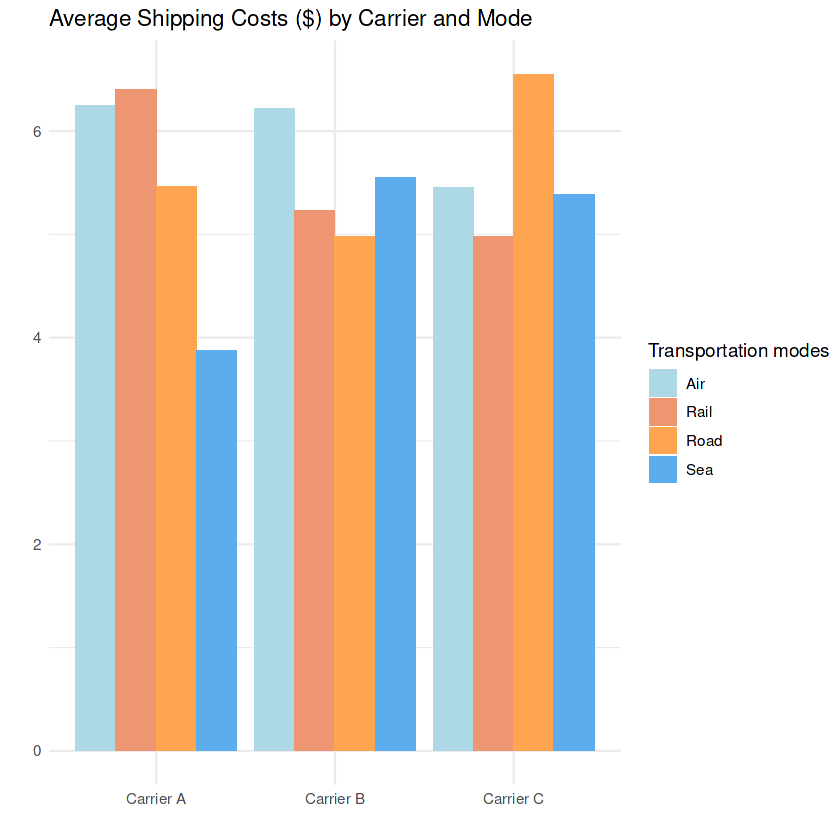

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")


# Average Shipping Costs by Carrier and Mode
carrier_mode_cost_analysis <- supply_chain_data %>%
  group_by(`Shipping carriers`, `Transportation modes`) %>%
  summarise(Average_Shipping_Cost = mean(`Shipping costs`, na.rm = TRUE)) %>%
  ungroup()

# Define custom colors for transportation modes
colour_mode <- c("Air" = "lightblue", "Rail" = "lightsalmon2", "Road" = "tan1", "Sea" = "steelblue2")

# Create bar chart for average shipping costs
Average_Shipping_Costs_by_Carrier_and_Mode <- ggplot(carrier_mode_cost_analysis, aes(x = `Shipping carriers`, y = Average_Shipping_Cost, fill = `Transportation modes`)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Average Shipping Costs ($) by Carrier and Mode",
       x = " ", y = " ") +
  theme_minimal() +
  scale_fill_manual(values = colour_mode)

print(Average_Shipping_Costs_by_Carrier_and_Mode)

# Save the plot with custom dimensions
ggsave("6-1 Average_Shipping_Costs_by_Carrier_and_Mode.png", plot = Average_Shipping_Costs_by_Carrier_and_Mode, width = 8, height = 6)

#### **2. Route Optimisation: Analyze transportation routes for efficiency gains.**
#### * Note on Assumptions: For the purposes of this analysis, the "Costs" column is presumed to encompass a wide array of logistics-related expenses beyond mere shipping fees. This simplification allows me to assess the overall efficiency of various transportation routes and modes. My objective is to explore the interplay of cost, speed, and reliability in logistics management, recognising that these components are crucial for optimisation.
#### Caveat: This is a hypothetical assumption intended for educational analysis. The actual composition of "Costs" may be more complex. Consequently, interpret the findings as exploratory insights into logistics operations rather than definitive conclusions.

#### Summary of transportation modes and routes

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Summary of transportation modes and routes
mode_route_summary <- supply_chain_data %>%
  dplyr::group_by(`Transportation modes`, Routes) %>%
  dplyr::summarise(Total_Costs = sum(Costs, na.rm = TRUE),
                   Average_Costs = mean(Costs, na.rm = TRUE),
                   Count = n()) %>%
  dplyr::ungroup()

# View the summary
print(mode_route_summary)

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'Transportation modes'. You can override
using the `.groups` argument.


# A tibble: 12 × 5
   `Transportation modes` Routes  Total_Costs Average_Costs Count
   <chr>                  <chr>         <dbl>         <dbl> <int>
 1 Air                    Route A       5801.          527.    11
 2 Air                    Route B       4465.          638.     7
 3 Air                    Route C       4339.          542.     8
 4 Rail                   Route A       6791.          485.    14
 5 Rail                   Route B       7007.          637.    11
 6 Rail                   Route C       1371.          457.     3
 7 Road                   Route A       5934.          539.    11
 8 Road                   Route B       7181.          552.    13
 9 Road                   Route C       2933.          587.     5
10 Sea                    Route A       2350.          336.     7
11 Sea                    Route B       3386.          564.     6
12 Sea                    Route C       1367.          342.     4


#### Costs by Route and Mode

Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


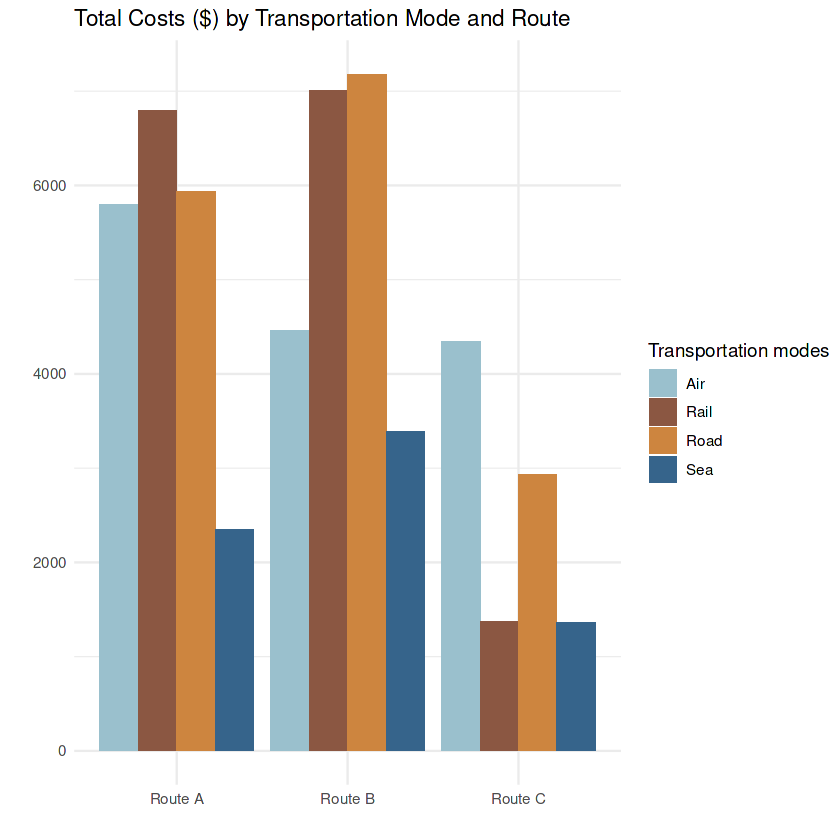

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Define custom colors for transportation modes
colour_mode_darker <- c("Air" = "lightblue3", "Rail" = "lightsalmon4", "Road" = "tan3", "Sea" = "steelblue4")


# Create bar chart for Costs by Route and Mode
Costs_by_Route_and_Mode <- ggplot(mode_route_summary, aes(x = Routes, y = Total_Costs, fill = `Transportation modes`)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Total Costs ($) by Transportation Mode and Route",
       x = " ", y = " ") +
  theme_minimal() +
  scale_fill_manual(values = colour_mode_darker)

print(Costs_by_Route_and_Mode)

# Save the plot with custom dimensions
ggsave("6-2 Costs_by_Route_and_Mode.png", plot = Costs_by_Route_and_Mode, width = 8, height = 6)


#### Efficiency Analysis by Route
#### Efficiency Score is defined as the number of shipments divided by the average cost, higher score indicates more shipments for each unit of cost, reflecting higher efficiency.

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Efficiency Analysis by Route
efficiency_analysis <- supply_chain_data %>%
  group_by(Routes) %>%
  summarise(Average_Cost = mean(Costs, na.rm = TRUE),
            Shipments = n()) %>%
  mutate(Efficiency_Score = Shipments / Average_Cost) %>%
  ungroup()

# View the efficiency analysis
print(efficiency_analysis)


Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 3 × 4
  Routes  Average_Cost Shipments Efficiency_Score
  <chr>          <dbl>     <int>            <dbl>
1 Route A         485.        43           0.0886
2 Route B         596.        37           0.0621
3 Route C         500.        20           0.0400


Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


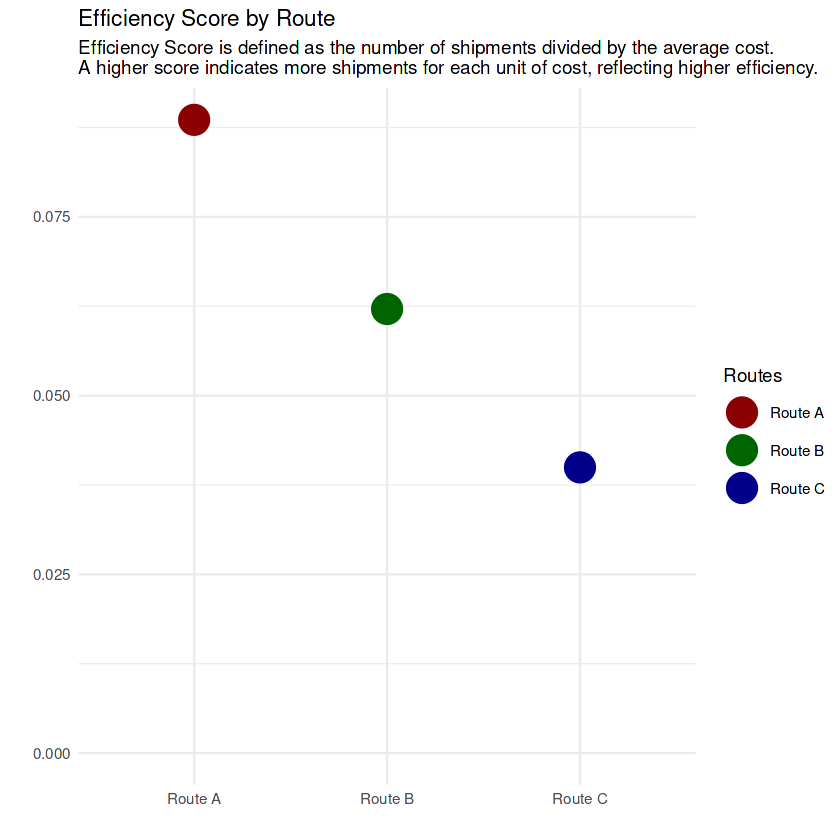

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Create scatter plot for Efficiency Score by Route
Efficiency_Score_by_Route <- ggplot(efficiency_analysis, aes(x = Routes, y = Efficiency_Score, color = Routes)) +
  geom_point(size = 8) +
  labs(title = "Efficiency Score by Route",
       subtitle = "Efficiency Score is defined as the number of shipments divided by the average cost.\nA higher score indicates more shipments for each unit of cost, reflecting higher efficiency.",
       x = " ", y = " ") +
  theme_minimal() +
  scale_color_manual(values = c("darkred", "darkgreen", "darkblue")) +
  scale_y_continuous(limits = c(0, NA)) # Set y-axis to start from 0

print(Efficiency_Score_by_Route)

# Save the plot with custom dimensions
ggsave("6-3 Efficiency_Score_by_Route.png", plot = Efficiency_Score_by_Route, width = 8, height = 6)


Rows: 100 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


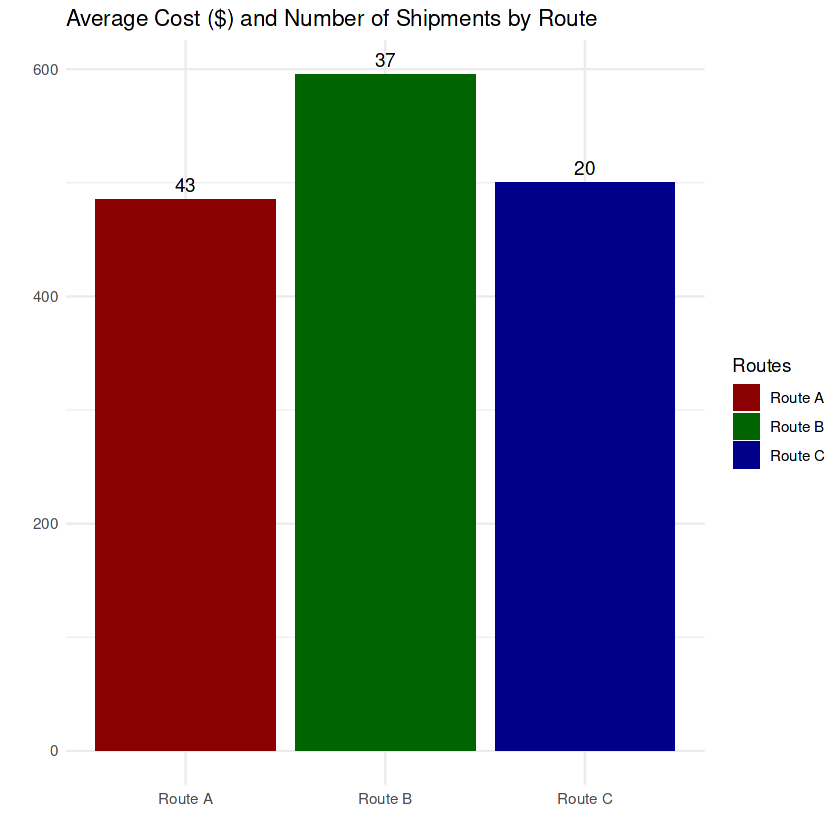

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import data
supply_chain_data <- read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

# Create bar chart for Average Cost and Shipments by Route
Average_Cost_and_Shipments_by_Route <- ggplot(efficiency_analysis, aes(x = Routes, y = Average_Cost, fill = Routes)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = Shipments, y = Average_Cost), vjust = -0.5, position = position_dodge(width = 0.9)) +
  labs(title = "Average Cost ($) and Number of Shipments by Route",
       x = "", y = " ") +
  theme_minimal() +
  scale_fill_manual(values = c("darkred", "darkgreen", "darkblue")) +
  scale_y_continuous(limits = c(0, NA)) # Set y-axis to start from 0

print(Average_Cost_and_Shipments_by_Route)

# Save the plot with custom dimensions
ggsave("6-4 Average_Cost_and_Shipments_by_Route.png", plot = Average_Cost_and_Shipments_by_Route, width = 8, height = 6)


# **Key Findings and Suggestions**

### Product and Customer Analysis Key Findings

**Trend Analysis by Product Type:**
- Distinct patterns emerged in total revenue, average stock levels, and average lead times across different product types.
- Higher revenue generation was often associated with lower stock levels, indicating efficient inventory turnover.
- Skincare products exhibited longer lead times, suggesting potential supply chain complexities or higher demand.

**Customer Demographics and Sales Trends:**
- Analysis of customer demographics revealed varying preferences and purchasing behaviors across different segments.
- Sales trends showed significant variations among these demographic groups within each product category.
- Further data collection and analysis are necessary for better insights into the 'Unknown' customer demographic segment.

**Predictive Analytics for Future Planning:**
- The analysis revealed how 'Availability' is influenced by factors such as 'Price', 'Number of Products Sold', and 'Lead Times'. Understanding these relationships offers strategic insights for managing inventory levels and planning future stock requirements.
- The interaction between price, sales volume, and lead times appears complex, indicating that changes in one factor could significantly impact product availability. This complexity underscores the need for a nuanced, multi-faceted approach to inventory management and forecasting.
- To enhance the accuracy and effectiveness of demand forecasting, there's a need for further data collection, particularly historical sales data. Having a more comprehensive dataset, including past sales trends, would allow for more precise predictions of future demand patterns.

### Supply Chain Analysis Key Findings

**Supply Chain Performance Evaluation:**
- Identified potential delays in both lead times and manufacturing lead times, underscoring areas for improvement in supply chain efficiency.
- Variability in pass rates among suppliers, despite similar defect rates, suggests additional factors influencing supplier performance. A notable discrepancy in Supplier 4's defect and pass rates may indicate inconsistencies in the inspection process.
- The difference in average defect rates between suppliers is marginal, with the highest being less than 1% more than the lowest, indicating a generally consistent quality across suppliers.

**Cost Management Analysis:**
- Manufacturing costs showed significant variation across suppliers and product types, impacting overall profitability.
- Supplier 3 demonstrated the highest profitability, benefiting from the lowest shipping and manufacturing costs, highlighting the importance of cost management in enhancing profit margins.
- Cosmetics emerged as the most profitable segment, suggesting a strategic focus area for the business.

**Logistics Optimization Study:**
- The analysis of shipping costs and routes revealed substantial opportunities for efficiency gains in logistics.
- Certain transportation modes and routes proved more cost-effective, suggesting the potential for strategic adjustments in logistics planning.
- Additional data collection on shipping durations is needed to ascertain the most efficient routes, emphasizing the need for comprehensive logistics data to optimise operations.


### **Suggestions**

**Strategic Product and Inventory Management:**
- Optimise inventory levels to align with current sales trends and customer preferences, ensuring efficient stock turnover. Evaluate the performance of various products and consider phasing out or revising strategies for underperforming items.
- Leverage predictive analytics insights to refine inventory management, aiming to minimise overstock and stockouts, thereby optimising inventory costs and availability.

**Customer-Centric Marketing and Sales Strategies:**
- Create and implement marketing campaigns that are specifically tailored based on the insights from the customer demographic analysis. This should involve customising product offerings and marketing messages to align with the preferences of different customer segments.
- Use targeted marketing to enhance customer engagement and loyalty, thereby driving sales and improving the overall customer experience.

**Enhanced Supplier Relationship and Cost Management:**
- Initiate a comprehensive review of supplier performance, focusing on areas such as lead time reduction and quality control improvements. This may involve supplier development programs or seeking alternative suppliers.
- Investigate strategies to reduce manufacturing and shipping costs. This could include renegotiating contracts with existing suppliers or exploring new supplier relationships that offer more favorable terms.

**Logistics and Transportation Optimisation:**
- Conduct a thorough reassessment of existing logistics strategies, with a focus on adopting the most cost-effective transportation modes and routes.   
- Explore the feasibility of multimodal transportation solutions, considering their potential to optimise the balance between cost, speed, and reliability.
- Implement a regular review process for logistics operations to ensure they remain efficient and cost-effective over time. This may also involve adapting to changing market conditions or leveraging new logistics technologies and methodologies.